In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
from keras.regularizers import l1

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split

%matplotlib inline

Part1- Data Preprocessing

Part2- Create Model Training

Part3- Make Future Prediction

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/LSTM_Paper/Data/FrequentlySoldFlightDestinations_v3.xlsx')

df = df.drop(columns=['Uzbekistan_Currency', 'SearchDay', 'Turkey_Covid', 'Azerbaijan_Covid', 'Uzbekistan_Covid', 'Germany_Covid',
    'UAE_Covid', 'Ukraine_Covid', 'Qatar_Covid', 'Netherlands_Covid'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

temperature_features = [
    'Istanbul_Temperature', 'Baku_Temperature', 'Ankara_Temperature',
    'Izmir_Temperature', 'Antalya_Temperature', 'Tashkent_Temperature',
    'Frankfurt_Temperature', 'Dubai_Temperature', 'Düsseldorf_Temperature',
    'Kyiv_Temperature', 'Doha_Temperature', 'Amsterdam_Temperature'
]

precipitation_features = [
    'Istanbul_Precipitation', 'Baku_Precipitation', 'Ankara_Precipitation',
    'Izmir_Precipitation', 'Antalya_Precipitation', 'Tashkent_Precipitation',
    'Frankfurt_Precipitation', 'Dubai_Precipitation', 'Düsseldorf_Precipitation',
    'Kyiv_Precipitation', 'Doha_Precipitation', 'Amsterdam_Precipitation'
]

currency_features = [
    'Turkey_Currency', 'Azerbaijan_Currency', 'Euro_Currency',
    'UAE_Currency', 'Ukraine_Currency', 'Qatar_Currency'
]

capita_features = [
    'Turkey_Capita', 'Azerbaijan_Capita', 'Uzbekistan_Capita', 'Germany_Capita',
    'UAE_Capita', 'Ukraine_Capita', 'Qatar_Capita', 'Netherlands_Capita'
]


individual_features = ['SearchCount', 'Turkey_Holidays']
individual_features_1 = ['SaleCount']

def normalize_group(df, features):
    scaler = MinMaxScaler(feature_range=(0.1, 1))
    df[features] = scaler.fit_transform(df[features])
    return df

scaler_individual = MinMaxScaler(feature_range=(0.1, 1))

for col in individual_features:
    df[[col]] = scaler_individual.fit_transform(df[[col]])


scaler_individual_1 = MinMaxScaler(feature_range=(0.1, 1))
df[individual_features_1] = scaler_individual_1.fit_transform(df[individual_features_1])

df = normalize_group(df, temperature_features)
df = normalize_group(df, precipitation_features)
df = normalize_group(df, currency_features)
df = normalize_group(df, capita_features)

# Check the results
print(df.head())

   SearchCount  SaleCount  Turkey_Holidays  Turkey_Currency  \
0     0.102498   0.120142              1.0         0.100132   
1     0.149305   0.355313              0.1         0.100000   
2     0.146632   0.337972              0.1         0.101332   
3     0.145661   0.323233              0.1         0.101753   
4     0.145170   0.317096              0.1         0.102250   

   Azerbaijan_Currency  Euro_Currency  UAE_Currency  Ukraine_Currency  \
0             0.100385       0.100000          0.64          0.100000   
1             0.100385       0.101646          0.64          0.107517   
2             0.100462       0.112757          0.64          0.106265   
3             0.100462       0.110700          0.64          0.108353   
4             0.100462       0.115226          0.64          0.112529   

   Qatar_Currency  Turkey_Capita  ...  Ankara_Precipitation  \
0        0.111995            0.1  ...              0.267748   
1        0.111195            0.1  ...              0.112

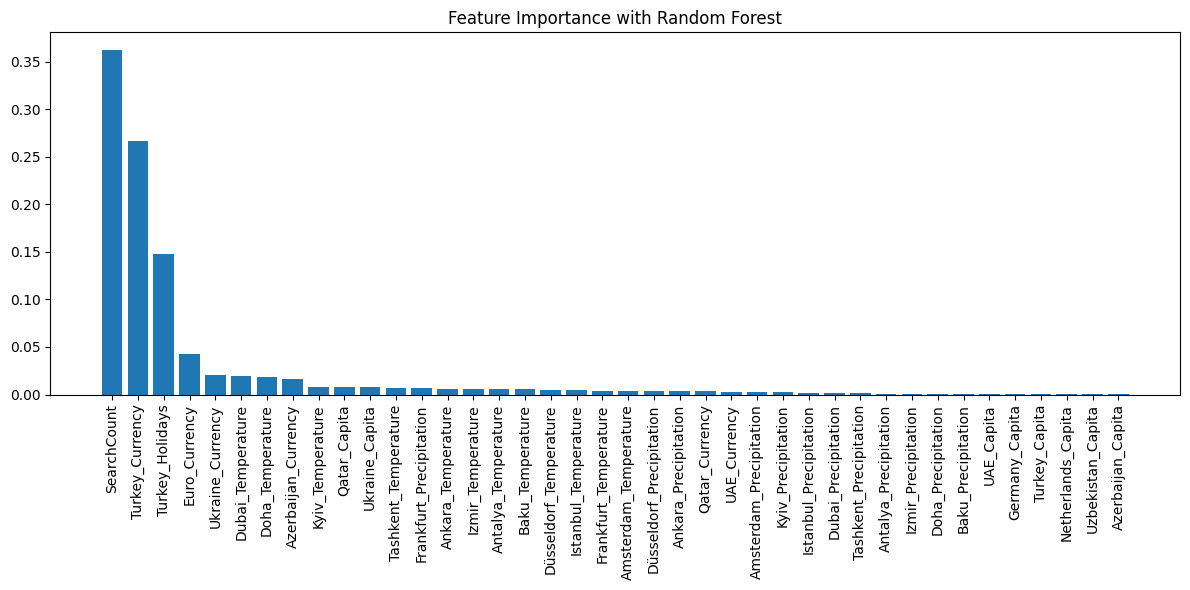

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X = df.drop(df.columns[1], axis=1)  # Features (all columns except the second)
y = df.iloc[:, 1]                   # Target (the second column)

# Train-Test Split (optional but recommended)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns

# Plotting Feature Importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance with Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Get indices of the top 12 important features
top_indices = np.argsort(importances)[::-1][:12]

top_features = feature_names[top_indices]

df_top_features = df[top_features.tolist() + [df.columns[1]]]

print(df_top_features.head())

   SearchCount  Turkey_Currency  Turkey_Holidays  Euro_Currency  \
0     0.102498         0.100132              1.0       0.100000   
1     0.149305         0.100000              0.1       0.101646   
2     0.146632         0.101332              0.1       0.112757   
3     0.145661         0.101753              0.1       0.110700   
4     0.145170         0.102250              0.1       0.115226   

   Ukraine_Currency  Dubai_Temperature  Doha_Temperature  Azerbaijan_Currency  \
0          0.100000           0.797645          0.912637             0.100385   
1          0.107517           0.795717          0.947253             0.100385   
2          0.106265           0.782227          0.899451             0.100462   
3          0.108353           0.776445          0.873077             0.100462   
4          0.112529           0.772591          0.861538             0.100462   

   Kyiv_Temperature  Qatar_Capita  Ukraine_Capita  Tashkent_Temperature  \
0          0.987868           1.0  

In [ ]:
#new_df = df[selected_features].copy()
new_df_scaled = df_top_features

'new_df = df_top_features\n\n# Optionally, normalize the dataset (Z-score normalization as an example)\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import MinMaxScaler\n#scaler = StandardScaler()\nscaler = MinMaxScaler(feature_range=(0.1, 1))\nnew_df_scaled = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)\n\n# Output the new dataset (scaled version)\nprint(new_df_scaled.head()'

In [ ]:
new_dataset = new_df_scaled.drop(columns=['SaleCount'])
Dataset = new_dataset.values
Labels = new_df_scaled[['SaleCount']].values

In [ ]:
import numpy as np

def create_sequences_with_gap(data, labels, n_past, n_future, gap):
    X, y = [], []
    for i in range(n_past, len(data) - n_future - gap + 1):

        X.append(data[i - n_past:i])
        y.append(labels[i + gap:i + gap + n_future])

    return np.array(X), np.array(y)

n_past = 100
n_future = 7
gap = 7

X, y = create_sequences_with_gap(Dataset, Labels, n_past, n_future, gap)

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (2748, 100, 1), y shape: (2748, 7, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2198, 100, 1)
y_train shape: (2198, 7, 1)
X_test shape: (550, 100, 1)
y_test shape: (550, 7, 1)


# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(LSTM(units=32, return_sequences=True, input_shape=(100, X_train.shape[2])))

model.add(LSTM(units=64, return_sequences=True))

model.add(LSTM(units=128, return_sequences=True))

model.add(LSTM(units=64, return_sequences=True))

model.add(LSTM(units=32, return_sequences=False))

model.add(Dropout(0.15))

model.add(Dense(units=7, activation='linear',kernel_regularizer=l1(0.0001)))

model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=50, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_LSTM_4_features.weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train,epochs=200, shuffle=True,callbacks=[es, rlr, mcp, tb], validation_split=0.25, verbose=1, batch_size=100)

Epoch 1/200
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1120
Epoch 1: val_loss improved from inf to 0.02710, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_LSTM_12_features.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.1070 - val_loss: 0.0271 - learning_rate: 0.0010
Epoch 2/200
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0314
Epoch 2: val_loss improved from 0.02710 to 0.02280, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_LSTM_12_features.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0314 - val_loss: 0.0228 - learning_rate: 0.0010
Epoch 3/200
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0283
Epoch 3: val_loss improved from 0.02280 to 0.02110, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_LSTM_12_features.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0282 - val_los

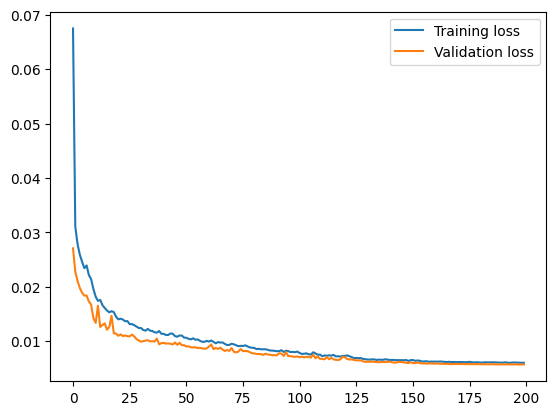

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
weights_path = '/content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_LSTM_12_features.weights.h5'
model.load_weights(weights_path)

print("Weights loaded successfully!")

Weights loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
Mean Absolute Error (MAE): 0.0584
Mean Squared Error (MSE): 0.0056
Root Mean Squared Error (RMSE): 0.0745


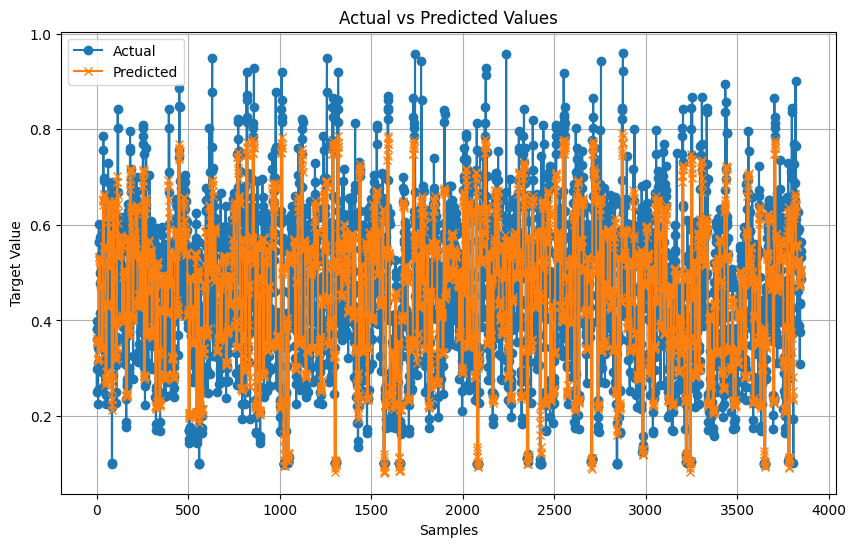

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

predictions = model.predict(X_test)

predictions = predictions.flatten()  # Convert to 1D array
y_test = y_test.flatten()

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", marker="o")
plt.plot(predictions, label="Predicted", marker="x")
plt.title("Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.legend()
plt.grid()
plt.show()


In [ ]:
predictions = model.predict(X_test)
y_test = y_test.flatten()
predictions = predictions.flatten()

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Mean Absolute Percentage Error (MAPE): 13.80%


# BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(units=32, return_sequences=True), input_shape=(100, X_train.shape[2])))

model.add(Bidirectional(LSTM(units=64, return_sequences=True)))

model.add(Bidirectional(LSTM(units=128, return_sequences=True)))

model.add(Bidirectional(LSTM(units=64, return_sequences=True)))

model.add(Bidirectional(LSTM(units=32, return_sequences=False)))

model.add(Dropout(0.15))

model.add(Dense(units=7, activation='linear',kernel_regularizer=l1(0.0001)))

model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=50, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/MyDrive/LSTM_Paper/Biletbank_Results/dataset_2_BiLSTM_currency.weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train,epochs=200, shuffle=True,callbacks=[es, rlr, mcp, tb], validation_split=0.25, verbose=1, batch_size=100)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0939
Epoch 1: val_loss improved from inf to 0.02875, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_BiLSTM_12_features.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0919 - val_loss: 0.0287 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0320
Epoch 2: val_loss improved from 0.02875 to 0.02210, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_BiLSTM_12_features.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0319 - val_loss: 0.0221 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0264
Epoch 3: val_loss improved from 0.02210 to 0.02199, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_BiLSTM_12_features.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0264 - 

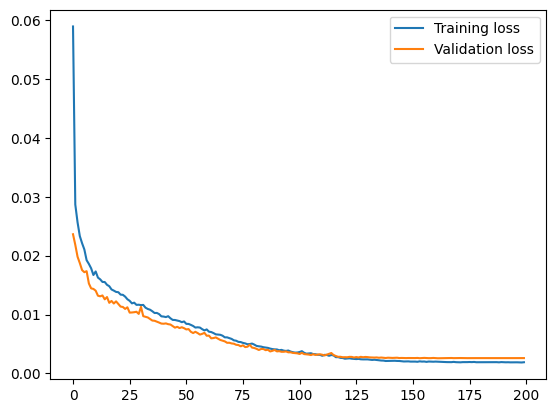

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
weights_path = '/content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_BiLSTM_12_features.weights.h5'
model.load_weights(weights_path)

print("Weights loaded successfully!")

Weights loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 66 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step
Mean Absolute Error (MAE): 0.0282
Mean Squared Error (MSE): 0.0019
Root Mean Squared Error (RMSE): 0.0432


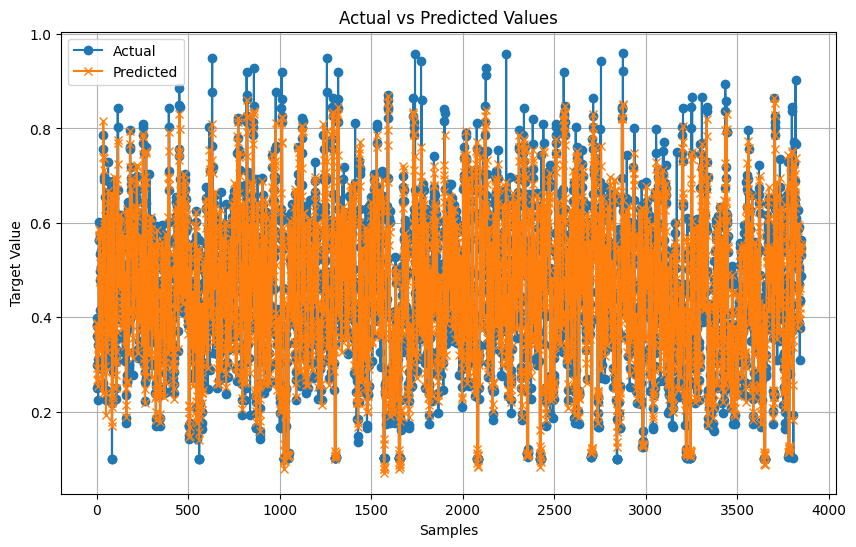

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

predictions = model.predict(X_test)

predictions = predictions.flatten()  # Convert to 1D array
y_test = y_test.flatten()

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", marker="o")
plt.plot(predictions, label="Predicted", marker="x")
plt.title("Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.legend()
plt.grid()
plt.show()


In [ ]:
predictions = model.predict(X_test)
y_test = y_test.flatten()
predictions = predictions.flatten()

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Mean Absolute Percentage Error (MAPE): 6.60%


# RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

In [ ]:
model = Sequential()

model.add(SimpleRNN(units=32, return_sequences=True, input_shape=(100, X_train.shape[2])))

model.add(SimpleRNN(units=64, return_sequences=True))

model.add(SimpleRNN(units=128, return_sequences=True))

model.add(SimpleRNN(units=64, return_sequences=True))

model.add(SimpleRNN(units=32, return_sequences=False))

model.add(Dropout(0.15))

model.add(Dense(units=7, activation='linear',kernel_regularizer=l1(0.0001)))

model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=50, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/MyDrive/LSTM_Paper/Biletbank_Results/dataset_2_RNN_currency.weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train,epochs=200, shuffle=True,callbacks=[es, rlr, mcp, tb], validation_split=0.25, verbose=1, batch_size=100)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 0.6667
Epoch 1: val_loss improved from inf to 0.05059, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_RNN_8_features.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 328ms/step - loss: 0.6499 - val_loss: 0.0506 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1590
Epoch 2: val_loss improved from 0.05059 to 0.03616, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_RNN_8_features.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1580 - val_loss: 0.0362 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1020
Epoch 3: val_loss did not improve from 0.03616
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1016 - val_loss: 0.0472 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0889
Epoch 4: val_loss improved from 0.

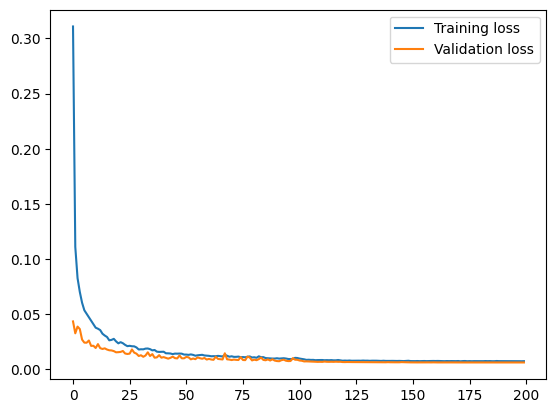

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
weights_path = '/content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_RNN_12_features.weights.h5'
model.load_weights(weights_path)

print("Weights loaded successfully!")

Weights loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Mean Absolute Error (MAE): 0.0447
Mean Squared Error (MSE): 0.0039
Root Mean Squared Error (RMSE): 0.0626


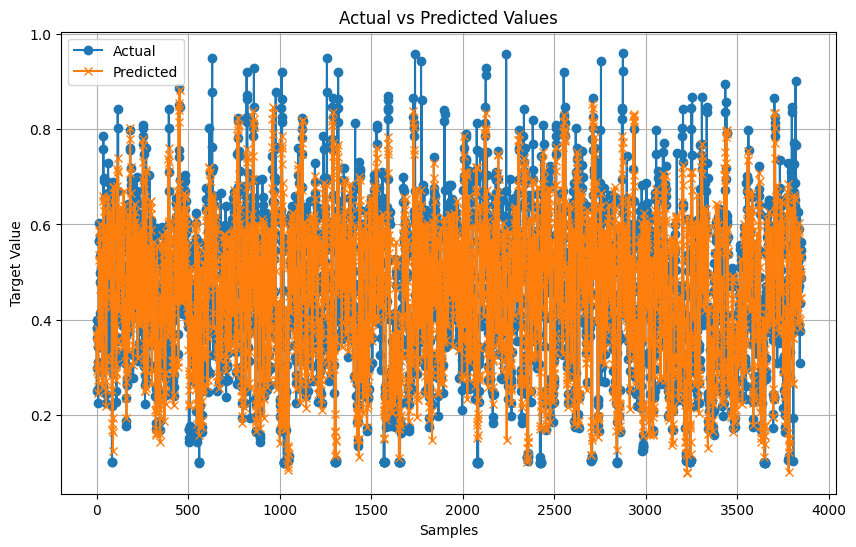

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

predictions = model.predict(X_test)

predictions = predictions.flatten()  # Convert to 1D array
y_test = y_test.flatten()

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", marker="o")
plt.plot(predictions, label="Predicted", marker="x")
plt.title("Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.legend()
plt.grid()
plt.show()


In [ ]:
predictions = model.predict(X_test)
y_test = y_test.flatten()
predictions = predictions.flatten()

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Mean Absolute Percentage Error (MAPE): 11.51%


# Proposed model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

In [ ]:
model = Sequential()

model.add(LSTM(units=32, return_sequences=True, input_shape=(100, X_train.shape[2])))

model.add(SimpleRNN(units=64, return_sequences=True))

model.add(SimpleRNN(units=128, return_sequences=True))

model.add(SimpleRNN(units=64, return_sequences=True))

model.add(LSTM(units=32, return_sequences=False))

model.add(Dropout(0.15))

model.add(Dense(units=7, activation='linear',kernel_regularizer=l1(0.0001)))

model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=50, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/MyDrive/LSTM_Paper/Biletbank_Results/dataset_2_ProposedModel_currency.weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train,epochs=200, shuffle=True,callbacks=[es, rlr, mcp, tb], validation_split=0.25, verbose=1, batch_size=100)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 0.2078
Epoch 1: val_loss improved from inf to 0.02578, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results/dataset_2_ProposedModel_currency.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - loss: 0.2022 - val_loss: 0.0258 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 0.0377
Epoch 2: val_loss improved from 0.02578 to 0.02172, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results/dataset_2_ProposedModel_currency.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - loss: 0.0376 - val_loss: 0.0217 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.0333
Epoch 3: val_loss improved from 0.02172 to 0.01949, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results/dataset_2_ProposedModel_currency.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - loss: 0.0332 - val_loss: 0.0195 - learning_rate: 0.0010
Epoch 4/200

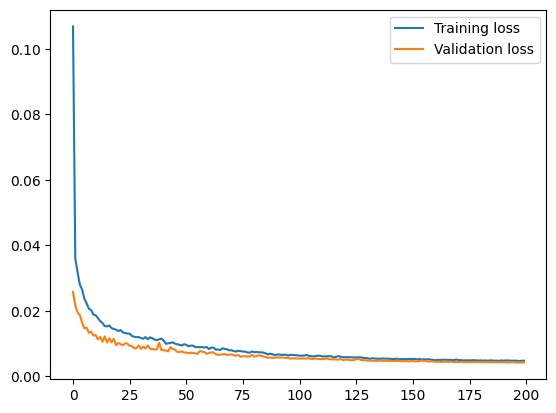

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
weights_path = '/content/drive/MyDrive/LSTM_Paper/Biletbank_Results/dataset_2_ProposedModel_currency.weights.h5'
model.load_weights(weights_path)

print("Weights loaded successfully!")

Weights loaded successfully!


In [ ]:
predictions = model.predict(X_test)
y_test = y_test.flatten()
predictions = predictions.flatten()

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step
Mean Absolute Percentage Error (MAPE): 7.87%


**New Proposed Method**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

In [ ]:
model = Sequential()

model.add(SimpleRNN(units=32, return_sequences=True, input_shape=(100, X_train.shape[2])))

model.add(SimpleRNN(units=64, return_sequences=True))

model.add(LSTM(units=128, return_sequences=True))

model.add(Bidirectional(LSTM(units=64, return_sequences=True)))

model.add(Bidirectional(LSTM(units=32, return_sequences=False)))

model.add(Dropout(0.15))

model.add(Dense(units=7, activation='linear',kernel_regularizer=l1(0.0001)))

model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=50, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='/content/drive/MyDrive/LSTM_Paper/Biletbank_Results/dataset_2_New_ProposedModel_currency_v3_suffle_false.weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train,epochs=200, shuffle=True,callbacks=[es, rlr, mcp, tb], validation_split=0.25, verbose=1, batch_size=100)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.1298
Epoch 1: val_loss improved from inf to 0.04503, saving model to /content/drive/MyDrive/LSTM_Paper/Biletbank_Results/dataset_2_New_ProposedModel_currency_v3_suffle_false.weights.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - loss: 0.1266 - val_loss: 0.0450 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0363
Epoch 2: val_loss did not improve from 0.04503
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 0.0362 - val_loss: 0.0516 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0306
Epoch 3: val_loss did not improve from 0.04503
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 0.0306 - val_loss: 0.0472 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0294
Epoch 4: val_loss did not improve from 0.04503
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0293 - val_loss: 0.0477 - learning_rate: 0.0010
Epoch 5/200

In [ ]:
weights_path = '/content/drive/MyDrive/LSTM_Paper/Biletbank_Results_with_Multiple_features/dataset_2_New_ProposedModel_currency_v2.weights.h5'
model.load_weights(weights_path)

print("Weights loaded successfully!")

Weights loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 48 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step
Mean Absolute Error (MAE): 0.0146
Mean Squared Error (MSE): 0.0004
Root Mean Squared Error (RMSE): 0.0209


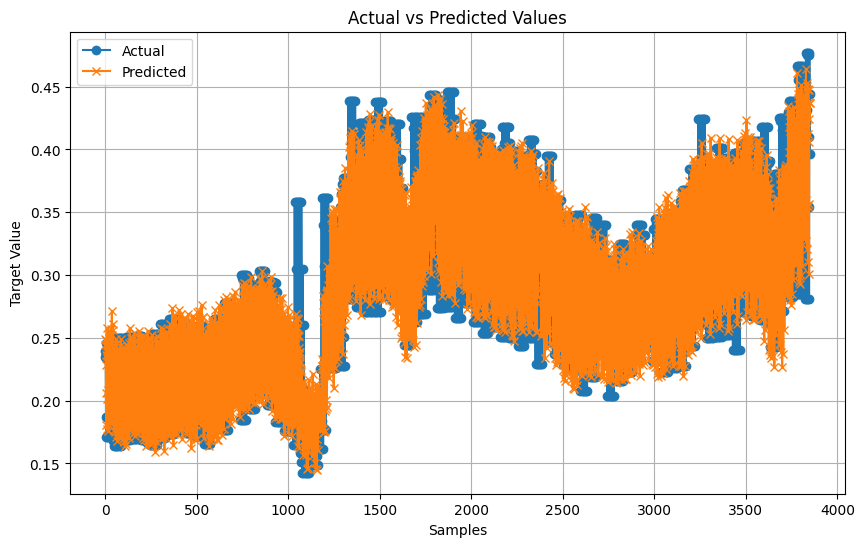

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

predictions = model.predict(X_test)

predictions = predictions.flatten()
y_test = y_test.flatten()

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", marker="o")
plt.plot(predictions, label="Predicted", marker="x")
plt.title("Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.legend()
plt.grid()
plt.show()


In [ ]:
predictions = model.predict(X_test)
y_test = y_test.flatten()
predictions = predictions.flatten()

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Mean Absolute Percentage Error (MAPE): 5.12%


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)             │ (None, 100, 32)             │           1,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, 100, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 100, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 100, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 740,855 (2.83 MB)

 Trainable params: 246,951 (964.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 493,904 (1.88 MB)

SARIMA and Prophet

In [ ]:
import itertools
p = d = q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_params = None

for param in itertools.product(p, d, q):
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_labels,
                         exog=train,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit(disp=False)

            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)

            print(f'SARIMA{param}x{param_seasonal} - AIC:{results.aic:.2f}')
        except Exception as e:
            print(f"Error with params {param}x{param_seasonal}: {str(e)}")
            continue

print(f'\nBest SARIMAX params: {best_params} with AIC: {best_aic:.2f}')

SARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:-1921.72
SARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:-3205.90
SARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:-3820.50
SARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:-5341.39
SARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:-5763.91
SARIMA(0, 0, 0)x(0, 1, 2, 7) - AIC:-5745.09
SARIMA(0, 0, 0)x(0, 2, 0, 7) - AIC:-3027.93
SARIMA(0, 0, 0)x(0, 2, 1, 7) - AIC:-5257.26
SARIMA(0, 0, 0)x(0, 2, 2, 7) - AIC:-5674.78
SARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:-5364.75
SARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:-5791.14
SARIMA(0, 0, 0)x(1, 0, 2, 7) - AIC:-5771.73
SARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:-5654.91
SARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:-5769.71
SARIMA(0, 0, 0)x(1, 1, 2, 7) - AIC:-5748.93
SARIMA(0, 0, 0)x(1, 2, 0, 7) - AIC:-4177.65
SARIMA(0, 0, 0)x(1, 2, 1, 7) - AIC:-5585.32
SARIMA(0, 0, 0)x(1, 2, 2, 7) - AIC:-5675.07
SARIMA(0, 0, 0)x(2, 0, 0, 7) - AIC:-5664.45
SARIMA(0, 0, 0)x(2, 0, 1, 7) - AIC:-5776.08


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(2, 0, 2, 7) - AIC:-5771.26
SARIMA(0, 0, 0)x(2, 1, 0, 7) - AIC:-5691.55
SARIMA(0, 0, 0)x(2, 1, 1, 7) - AIC:-5751.79


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(2, 1, 2, 7) - AIC:-5748.30
SARIMA(0, 0, 0)x(2, 2, 0, 7) - AIC:-4594.60
SARIMA(0, 0, 0)x(2, 2, 1, 7) - AIC:-5624.58
SARIMA(0, 0, 0)x(2, 2, 2, 7) - AIC:-5673.07
SARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:-3371.91
SARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:-4264.49
SARIMA(0, 0, 1)x(0, 0, 2, 7) - AIC:-4695.31
SARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:-5904.50
SARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:-6475.72
SARIMA(0, 0, 1)x(0, 1, 2, 7) - AIC:-6463.31
SARIMA(0, 0, 1)x(0, 2, 0, 7) - AIC:-3556.86
SARIMA(0, 0, 1)x(0, 2, 1, 7) - AIC:-5817.23
SARIMA(0, 0, 1)x(0, 2, 2, 7) - AIC:-6379.64
SARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:-5940.51
SARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:-6503.40
SARIMA(0, 0, 1)x(1, 0, 2, 7) - AIC:-6490.32
SARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:-6261.14
SARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:-6489.01
SARIMA(0, 0, 1)x(1, 1, 2, 7) - AIC:-6462.16
SARIMA(0, 0, 1)x(1, 2, 0, 7) - AIC:-4680.05


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(1, 2, 1, 7) - AIC:-6186.58
SARIMA(0, 0, 1)x(1, 2, 2, 7) - AIC:-6387.20
SARIMA(0, 0, 1)x(2, 0, 0, 7) - AIC:-6274.43
SARIMA(0, 0, 1)x(2, 0, 1, 7) - AIC:-6497.81


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(2, 0, 2, 7) - AIC:-6488.36
SARIMA(0, 0, 1)x(2, 1, 0, 7) - AIC:-6352.81
SARIMA(0, 0, 1)x(2, 1, 1, 7) - AIC:-6467.10
SARIMA(0, 0, 1)x(2, 1, 2, 7) - AIC:-6460.48
SARIMA(0, 0, 1)x(2, 2, 0, 7) - AIC:-5136.54
SARIMA(0, 0, 1)x(2, 2, 1, 7) - AIC:-6283.77
SARIMA(0, 0, 1)x(2, 2, 2, 7) - AIC:-6384.82
SARIMA(0, 0, 2)x(0, 0, 0, 7) - AIC:-3860.57
SARIMA(0, 0, 2)x(0, 0, 1, 7) - AIC:-4579.43
SARIMA(0, 0, 2)x(0, 0, 2, 7) - AIC:-4967.31
SARIMA(0, 0, 2)x(0, 1, 0, 7) - AIC:-6014.13
SARIMA(0, 0, 2)x(0, 1, 1, 7) - AIC:-6695.04
SARIMA(0, 0, 2)x(0, 1, 2, 7) - AIC:-6677.09
SARIMA(0, 0, 2)x(0, 2, 0, 7) - AIC:-3634.41
SARIMA(0, 0, 2)x(0, 2, 1, 7) - AIC:-5926.42
SARIMA(0, 0, 2)x(0, 2, 2, 7) - AIC:-6595.81
SARIMA(0, 0, 2)x(1, 0, 0, 7) - AIC:-6062.05
SARIMA(0, 0, 2)x(1, 0, 1, 7) - AIC:-6722.52
SARIMA(0, 0, 2)x(1, 0, 2, 7) - AIC:-6704.05
SARIMA(0, 0, 2)x(1, 1, 0, 7) - AIC:-6425.72
SARIMA(0, 0, 2)x(1, 1, 1, 7) - AIC:-6703.40
SARIMA(0, 0, 2)x(1, 1, 2, 7) - AIC:-6675.53
SARIMA(0, 0, 2)x(1, 2, 0, 7) - A

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(1, 2, 2, 7) - AIC:-6598.96
SARIMA(0, 0, 2)x(2, 0, 0, 7) - AIC:-6442.13


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(2, 0, 1, 7) - AIC:-6715.56


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(2, 0, 2, 7) - AIC:-6700.81
SARIMA(0, 0, 2)x(2, 1, 0, 7) - AIC:-6532.73
SARIMA(0, 0, 2)x(2, 1, 1, 7) - AIC:-6684.45
SARIMA(0, 0, 2)x(2, 1, 2, 7) - AIC:-6675.08
SARIMA(0, 0, 2)x(2, 2, 0, 7) - AIC:-5262.15
SARIMA(0, 0, 2)x(2, 2, 1, 7) - AIC:-6463.13


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(2, 2, 2, 7) - AIC:-6585.87
SARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC:-4463.19
SARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC:-5180.87
SARIMA(0, 1, 0)x(0, 0, 2, 7) - AIC:-5503.59
SARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:-5492.69
SARIMA(0, 1, 0)x(0, 1, 1, 7) - AIC:-6732.10
SARIMA(0, 1, 0)x(0, 1, 2, 7) - AIC:-6711.83
SARIMA(0, 1, 0)x(0, 2, 0, 7) - AIC:-3044.02
SARIMA(0, 1, 0)x(0, 2, 1, 7) - AIC:-5407.45
SARIMA(0, 1, 0)x(0, 2, 2, 7) - AIC:-6615.43
SARIMA(0, 1, 0)x(1, 0, 0, 7) - AIC:-5872.90
SARIMA(0, 1, 0)x(1, 0, 1, 7) - AIC:-6755.96
SARIMA(0, 1, 0)x(1, 0, 2, 7) - AIC:-6735.96
SARIMA(0, 1, 0)x(1, 1, 0, 7) - AIC:-5994.25
SARIMA(0, 1, 0)x(1, 1, 1, 7) - AIC:-6734.62
SARIMA(0, 1, 0)x(1, 1, 2, 7) - AIC:-6710.73
SARIMA(0, 1, 0)x(1, 2, 0, 7) - AIC:-4220.25
SARIMA(0, 1, 0)x(1, 2, 1, 7) - AIC:-5923.46
SARIMA(0, 1, 0)x(1, 2, 2, 7) - AIC:-6613.05
SARIMA(0, 1, 0)x(2, 0, 0, 7) - AIC:-6152.88
SARIMA(0, 1, 0)x(2, 0, 1, 7) - AIC:-6738.17


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 2, 7) - AIC:-6735.88
SARIMA(0, 1, 0)x(2, 1, 0, 7) - AIC:-6211.37
SARIMA(0, 1, 0)x(2, 1, 1, 7) - AIC:-6710.34
SARIMA(0, 1, 0)x(2, 1, 2, 7) - AIC:-6706.10
SARIMA(0, 1, 0)x(2, 2, 0, 7) - AIC:-4740.04
SARIMA(0, 1, 0)x(2, 2, 1, 7) - AIC:-6142.72


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 2, 2, 7) - AIC:-6599.65
SARIMA(0, 1, 1)x(0, 0, 0, 7) - AIC:-4956.99
SARIMA(0, 1, 1)x(0, 0, 1, 7) - AIC:-5479.16
SARIMA(0, 1, 1)x(0, 0, 2, 7) - AIC:-5793.08
SARIMA(0, 1, 1)x(0, 1, 0, 7) - AIC:-5747.85
SARIMA(0, 1, 1)x(0, 1, 1, 7) - AIC:-7038.91
SARIMA(0, 1, 1)x(0, 1, 2, 7) - AIC:-7010.21
SARIMA(0, 1, 1)x(0, 2, 0, 7) - AIC:-3266.45
SARIMA(0, 1, 1)x(0, 2, 1, 7) - AIC:-5661.47
SARIMA(0, 1, 1)x(0, 2, 2, 7) - AIC:-6921.00
SARIMA(0, 1, 1)x(1, 0, 0, 7) - AIC:-6137.92
SARIMA(0, 1, 1)x(1, 0, 1, 7) - AIC:-7063.89
SARIMA(0, 1, 1)x(1, 0, 2, 7) - AIC:-7035.16
SARIMA(0, 1, 1)x(1, 1, 0, 7) - AIC:-6317.61
SARIMA(0, 1, 1)x(1, 1, 1, 7) - AIC:-7035.16
SARIMA(0, 1, 1)x(1, 1, 2, 7) - AIC:-7008.80
SARIMA(0, 1, 1)x(1, 2, 0, 7) - AIC:-4520.58


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 2, 1, 7) - AIC:-6242.80


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 2, 2, 7) - AIC:-6913.35
SARIMA(0, 1, 1)x(2, 0, 0, 7) - AIC:-6470.43
SARIMA(0, 1, 1)x(2, 0, 1, 7) - AIC:-7042.18
SARIMA(0, 1, 1)x(2, 0, 2, 7) - AIC:-7034.85
SARIMA(0, 1, 1)x(2, 1, 0, 7) - AIC:-6533.16
SARIMA(0, 1, 1)x(2, 1, 1, 7) - AIC:-7015.60
SARIMA(0, 1, 1)x(2, 1, 2, 7) - AIC:-7005.62
SARIMA(0, 1, 1)x(2, 2, 0, 7) - AIC:-5058.83
SARIMA(0, 1, 1)x(2, 2, 1, 7) - AIC:-6463.50


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 2, 2, 7) - AIC:-6876.14
SARIMA(0, 1, 2)x(0, 0, 0, 7) - AIC:-5202.07
SARIMA(0, 1, 2)x(0, 0, 1, 7) - AIC:-5791.71
SARIMA(0, 1, 2)x(0, 0, 2, 7) - AIC:-6040.75
SARIMA(0, 1, 2)x(0, 1, 0, 7) - AIC:-5888.90
SARIMA(0, 1, 2)x(0, 1, 1, 7) - AIC:-7128.84


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 1, 2, 7) - AIC:-7099.92
SARIMA(0, 1, 2)x(0, 2, 0, 7) - AIC:-3543.49
SARIMA(0, 1, 2)x(0, 2, 1, 7) - AIC:-5795.06


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 2, 2, 7) - AIC:-7008.51
SARIMA(0, 1, 2)x(1, 0, 0, 7) - AIC:-6300.09


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 1, 7) - AIC:-7153.64


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 2, 7) - AIC:-7124.26
SARIMA(0, 1, 2)x(1, 1, 0, 7) - AIC:-6374.18


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 1, 1, 7) - AIC:-7125.67
SARIMA(0, 1, 2)x(1, 1, 2, 7) - AIC:-7098.52
SARIMA(0, 1, 2)x(1, 2, 0, 7) - AIC:-4572.77
SARIMA(0, 1, 2)x(1, 2, 1, 7) - AIC:-6295.99


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 2, 2, 7) - AIC:-6985.66
SARIMA(0, 1, 2)x(2, 0, 0, 7) - AIC:-6549.82


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 1, 7) - AIC:-7135.29
SARIMA(0, 1, 2)x(2, 0, 2, 7) - AIC:-7125.07
SARIMA(0, 1, 2)x(2, 1, 0, 7) - AIC:-6595.58


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 1, 1, 7) - AIC:-7105.73
SARIMA(0, 1, 2)x(2, 1, 2, 7) - AIC:-7095.30
SARIMA(0, 1, 2)x(2, 2, 0, 7) - AIC:-5119.67
SARIMA(0, 1, 2)x(2, 2, 1, 7) - AIC:-6525.55
SARIMA(0, 1, 2)x(2, 2, 2, 7) - AIC:-6954.28
SARIMA(0, 2, 0)x(0, 0, 0, 7) - AIC:-2392.73
SARIMA(0, 2, 0)x(0, 0, 1, 7) - AIC:-3124.48
SARIMA(0, 2, 0)x(0, 0, 2, 7) - AIC:-3413.36
SARIMA(0, 2, 0)x(0, 1, 0, 7) - AIC:-3365.32
SARIMA(0, 2, 0)x(0, 1, 1, 7) - AIC:-4592.58
SARIMA(0, 2, 0)x(0, 1, 2, 7) - AIC:-4584.09
SARIMA(0, 2, 0)x(0, 2, 0, 7) - AIC:-959.26
SARIMA(0, 2, 0)x(0, 2, 1, 7) - AIC:-3293.40
SARIMA(0, 2, 0)x(0, 2, 2, 7) - AIC:-4488.23
SARIMA(0, 2, 0)x(1, 0, 0, 7) - AIC:-3759.56
SARIMA(0, 2, 0)x(1, 0, 1, 7) - AIC:-4609.82
SARIMA(0, 2, 0)x(1, 0, 2, 7) - AIC:-4601.89
SARIMA(0, 2, 0)x(1, 1, 0, 7) - AIC:-3816.84
SARIMA(0, 2, 0)x(1, 1, 1, 7) - AIC:-4598.78
SARIMA(0, 2, 0)x(1, 1, 2, 7) - AIC:-4584.33
SARIMA(0, 2, 0)x(1, 2, 0, 7) - AIC:-2058.83
SARIMA(0, 2, 0)x(1, 2, 1, 7) - AIC:-3753.66


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 0)x(1, 2, 2, 7) - AIC:-4488.75
SARIMA(0, 2, 0)x(2, 0, 0, 7) - AIC:-3992.52
SARIMA(0, 2, 0)x(2, 0, 1, 7) - AIC:-4601.30
SARIMA(0, 2, 0)x(2, 0, 2, 7) - AIC:-4603.02
SARIMA(0, 2, 0)x(2, 1, 0, 7) - AIC:-4054.93
SARIMA(0, 2, 0)x(2, 1, 1, 7) - AIC:-4585.90
SARIMA(0, 2, 0)x(2, 1, 2, 7) - AIC:-4580.50
SARIMA(0, 2, 0)x(2, 2, 0, 7) - AIC:-2587.77
SARIMA(0, 2, 0)x(2, 2, 1, 7) - AIC:-3992.94
SARIMA(0, 2, 0)x(2, 2, 2, 7) - AIC:-4485.39
SARIMA(0, 2, 1)x(0, 0, 0, 7) - AIC:-4447.66
SARIMA(0, 2, 1)x(0, 0, 1, 7) - AIC:-5166.24
SARIMA(0, 2, 1)x(0, 0, 2, 7) - AIC:-5488.95
SARIMA(0, 2, 1)x(0, 1, 0, 7) - AIC:-5476.83
SARIMA(0, 2, 1)x(0, 1, 1, 7) - AIC:-6712.10
SARIMA(0, 2, 1)x(0, 1, 2, 7) - AIC:-6691.81
SARIMA(0, 2, 1)x(0, 2, 0, 7) - AIC:-3030.53
SARIMA(0, 2, 1)x(0, 2, 1, 7) - AIC:-5384.62
SARIMA(0, 2, 1)x(0, 2, 2, 7) - AIC:-6588.39
SARIMA(0, 2, 1)x(1, 0, 0, 7) - AIC:-5859.59
SARIMA(0, 2, 1)x(1, 0, 1, 7) - AIC:-6734.64
SARIMA(0, 2, 1)x(1, 0, 2, 7) - AIC:-6714.85
SARIMA(0, 2, 1)x(1, 1, 0, 7) - A

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(1, 1, 2, 7) - AIC:-6690.91
SARIMA(0, 2, 1)x(1, 2, 0, 7) - AIC:-4207.66
SARIMA(0, 2, 1)x(1, 2, 1, 7) - AIC:-5899.17


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(1, 2, 2, 7) - AIC:-6585.13
SARIMA(0, 2, 1)x(2, 0, 0, 7) - AIC:-6139.44
SARIMA(0, 2, 1)x(2, 0, 1, 7) - AIC:-6719.22


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(2, 0, 2, 7) - AIC:-6713.31
SARIMA(0, 2, 1)x(2, 1, 0, 7) - AIC:-6197.90


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(2, 1, 1, 7) - AIC:-6691.51
SARIMA(0, 2, 1)x(2, 1, 2, 7) - AIC:-6685.30
SARIMA(0, 2, 1)x(2, 2, 0, 7) - AIC:-4727.22


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(2, 2, 1, 7) - AIC:-6120.18


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(2, 2, 2, 7) - AIC:-6460.63
SARIMA(0, 2, 2)x(0, 0, 0, 7) - AIC:-4939.58
SARIMA(0, 2, 2)x(0, 0, 1, 7) - AIC:-5463.09


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(0, 0, 2, 7) - AIC:-5777.93
SARIMA(0, 2, 2)x(0, 1, 0, 7) - AIC:-5731.79


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(0, 1, 1, 7) - AIC:-7018.47
SARIMA(0, 2, 2)x(0, 1, 2, 7) - AIC:-6989.71
SARIMA(0, 2, 2)x(0, 2, 0, 7) - AIC:-3252.80
SARIMA(0, 2, 2)x(0, 2, 1, 7) - AIC:-5638.40


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(0, 2, 2, 7) - AIC:-6881.99
SARIMA(0, 2, 2)x(1, 0, 0, 7) - AIC:-6123.34


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(1, 0, 1, 7) - AIC:-7042.04


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(1, 0, 2, 7) - AIC:-7013.26
SARIMA(0, 2, 2)x(1, 1, 0, 7) - AIC:-6302.85


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(1, 1, 1, 7) - AIC:-7013.61


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(1, 1, 2, 7) - AIC:-6988.54
SARIMA(0, 2, 2)x(1, 2, 0, 7) - AIC:-4506.72


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(1, 2, 1, 7) - AIC:-6218.03


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(1, 2, 2, 7) - AIC:-6849.35
SARIMA(0, 2, 2)x(2, 0, 0, 7) - AIC:-6455.57


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(2, 0, 1, 7) - AIC:-7020.33


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(2, 0, 2, 7) - AIC:-7013.13
SARIMA(0, 2, 2)x(2, 1, 0, 7) - AIC:-6518.27


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(2, 1, 1, 7) - AIC:-6977.07


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(2, 1, 2, 7) - AIC:-6984.24


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(2, 2, 0, 7) - AIC:-5044.61


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(2, 2, 1, 7) - AIC:-6439.45


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(2, 2, 2, 7) - AIC:-6711.90
SARIMA(1, 0, 0)x(0, 0, 0, 7) - AIC:-4559.12
SARIMA(1, 0, 0)x(0, 0, 1, 7) - AIC:-5237.35
SARIMA(1, 0, 0)x(0, 0, 2, 7) - AIC:-5571.87
SARIMA(1, 0, 0)x(0, 1, 0, 7) - AIC:-6096.08


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(0, 1, 1, 7) - AIC:-6993.89
SARIMA(1, 0, 0)x(0, 1, 2, 7) - AIC:-6974.89
SARIMA(1, 0, 0)x(0, 2, 0, 7) - AIC:-3689.26
SARIMA(1, 0, 0)x(0, 2, 1, 7) - AIC:-6007.43
SARIMA(1, 0, 0)x(0, 2, 2, 7) - AIC:-6884.92
SARIMA(1, 0, 0)x(1, 0, 0, 7) - AIC:-6157.07
SARIMA(1, 0, 0)x(1, 0, 1, 7) - AIC:-7019.56
SARIMA(1, 0, 0)x(1, 0, 2, 7) - AIC:-7001.02
SARIMA(1, 0, 0)x(1, 1, 0, 7) - AIC:-6532.66
SARIMA(1, 0, 0)x(1, 1, 1, 7) - AIC:-6998.93


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(1, 1, 2, 7) - AIC:-6972.61
SARIMA(1, 0, 0)x(1, 2, 0, 7) - AIC:-4853.55
SARIMA(1, 0, 0)x(1, 2, 1, 7) - AIC:-6463.30


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(1, 2, 2, 7) - AIC:-6884.77
SARIMA(1, 0, 0)x(2, 0, 0, 7) - AIC:-6559.26
SARIMA(1, 0, 0)x(2, 0, 1, 7) - AIC:-6999.90
SARIMA(1, 0, 0)x(2, 0, 2, 7) - AIC:-6999.04
SARIMA(1, 0, 0)x(2, 1, 0, 7) - AIC:-6684.39
SARIMA(1, 0, 0)x(2, 1, 1, 7) - AIC:-6969.23


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(2, 1, 2, 7) - AIC:-6969.48
SARIMA(1, 0, 0)x(2, 2, 0, 7) - AIC:-5335.81
SARIMA(1, 0, 0)x(2, 2, 1, 7) - AIC:-6614.41


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)x(2, 2, 2, 7) - AIC:-6814.13
SARIMA(1, 0, 1)x(0, 0, 0, 7) - AIC:-4959.56
SARIMA(1, 0, 1)x(0, 0, 1, 7) - AIC:-5486.11
SARIMA(1, 0, 1)x(0, 0, 2, 7) - AIC:-5808.82
SARIMA(1, 0, 1)x(0, 1, 0, 7) - AIC:-6097.58
SARIMA(1, 0, 1)x(0, 1, 1, 7) - AIC:-7113.90
SARIMA(1, 0, 1)x(0, 1, 2, 7) - AIC:-7087.08
SARIMA(1, 0, 1)x(0, 2, 0, 7) - AIC:-3684.95
SARIMA(1, 0, 1)x(0, 2, 1, 7) - AIC:-6008.84
SARIMA(1, 0, 1)x(0, 2, 2, 7) - AIC:-6999.68
SARIMA(1, 0, 1)x(1, 0, 0, 7) - AIC:-6188.83


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 0, 1, 7) - AIC:-7139.44


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 0, 2, 7) - AIC:-7112.61
SARIMA(1, 0, 1)x(1, 1, 0, 7) - AIC:-6564.67
SARIMA(1, 0, 1)x(1, 1, 1, 7) - AIC:-7112.06


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 1, 2, 7) - AIC:-7084.93
SARIMA(1, 0, 1)x(1, 2, 0, 7) - AIC:-4863.02
SARIMA(1, 0, 1)x(1, 2, 1, 7) - AIC:-6491.86


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 2, 2, 7) - AIC:-6981.86
SARIMA(1, 0, 1)x(2, 0, 0, 7) - AIC:-6600.74


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 0, 1, 7) - AIC:-7116.22


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 0, 2, 7) - AIC:-7112.11
SARIMA(1, 0, 1)x(2, 1, 0, 7) - AIC:-6730.64
SARIMA(1, 0, 1)x(2, 1, 1, 7) - AIC:-7084.91


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 1, 2, 7) - AIC:-7082.17
SARIMA(1, 0, 1)x(2, 2, 0, 7) - AIC:-5352.09
SARIMA(1, 0, 1)x(2, 2, 1, 7) - AIC:-6660.39


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 2, 2, 7) - AIC:-6991.02
SARIMA(1, 0, 2)x(0, 0, 0, 7) - AIC:-5204.07
SARIMA(1, 0, 2)x(0, 0, 1, 7) - AIC:-5793.49


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(0, 0, 2, 7) - AIC:-6042.65
SARIMA(1, 0, 2)x(0, 1, 0, 7) - AIC:-6091.96
SARIMA(1, 0, 2)x(0, 1, 1, 7) - AIC:-7159.44
SARIMA(1, 0, 2)x(0, 1, 2, 7) - AIC:-7130.46
SARIMA(1, 0, 2)x(0, 2, 0, 7) - AIC:-3680.46
SARIMA(1, 0, 2)x(0, 2, 1, 7) - AIC:-6003.64
SARIMA(1, 0, 2)x(0, 2, 2, 7) - AIC:-7041.19
SARIMA(1, 0, 2)x(1, 0, 0, 7) - AIC:-6299.34


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 0, 1, 7) - AIC:-7184.44


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 0, 2, 7) - AIC:-7152.80
SARIMA(1, 0, 2)x(1, 1, 0, 7) - AIC:-6562.69
SARIMA(1, 0, 2)x(1, 1, 1, 7) - AIC:-7156.07


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 1, 2, 7) - AIC:-7129.38
SARIMA(1, 0, 2)x(1, 2, 0, 7) - AIC:-4863.46
SARIMA(1, 0, 2)x(1, 2, 1, 7) - AIC:-6486.68


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 2, 2, 7) - AIC:-7020.98
SARIMA(1, 0, 2)x(2, 0, 0, 7) - AIC:-6599.51


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 0, 1, 7) - AIC:-7163.09


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 0, 2, 7) - AIC:-7156.07


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 1, 0, 7) - AIC:-6732.09
SARIMA(1, 0, 2)x(2, 1, 1, 7) - AIC:-7134.04
SARIMA(1, 0, 2)x(2, 1, 2, 7) - AIC:-7125.82
SARIMA(1, 0, 2)x(2, 2, 0, 7) - AIC:-5350.12


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 2, 1, 7) - AIC:-6661.82


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 2, 2, 7) - AIC:-7013.71
SARIMA(1, 1, 0)x(0, 0, 0, 7) - AIC:-4595.94
SARIMA(1, 1, 0)x(0, 0, 1, 7) - AIC:-5307.88
SARIMA(1, 1, 0)x(0, 0, 2, 7) - AIC:-5658.31
SARIMA(1, 1, 0)x(0, 1, 0, 7) - AIC:-5666.79
SARIMA(1, 1, 0)x(0, 1, 1, 7) - AIC:-6920.55
SARIMA(1, 1, 0)x(0, 1, 2, 7) - AIC:-6895.79
SARIMA(1, 1, 0)x(0, 2, 0, 7) - AIC:-3192.90
SARIMA(1, 1, 0)x(0, 2, 1, 7) - AIC:-5580.58
SARIMA(1, 1, 0)x(0, 2, 2, 7) - AIC:-6803.66
SARIMA(1, 1, 0)x(1, 0, 0, 7) - AIC:-6033.15
SARIMA(1, 1, 0)x(1, 0, 1, 7) - AIC:-6945.07
SARIMA(1, 1, 0)x(1, 0, 2, 7) - AIC:-6920.54
SARIMA(1, 1, 0)x(1, 1, 0, 7) - AIC:-6211.30
SARIMA(1, 1, 0)x(1, 1, 1, 7) - AIC:-6919.63


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 2, 7) - AIC:-6893.44
SARIMA(1, 1, 0)x(1, 2, 0, 7) - AIC:-4430.16
SARIMA(1, 1, 0)x(1, 2, 1, 7) - AIC:-6143.11


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 2, 2, 7) - AIC:-6798.15
SARIMA(1, 1, 0)x(2, 0, 0, 7) - AIC:-6356.66
SARIMA(1, 1, 0)x(2, 0, 1, 7) - AIC:-6919.32


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 2, 7) - AIC:-6918.25
SARIMA(1, 1, 0)x(2, 1, 0, 7) - AIC:-6416.83
SARIMA(1, 1, 0)x(2, 1, 1, 7) - AIC:-6893.16
SARIMA(1, 1, 0)x(2, 1, 2, 7) - AIC:-6890.96
SARIMA(1, 1, 0)x(2, 2, 0, 7) - AIC:-4949.01
SARIMA(1, 1, 0)x(2, 2, 1, 7) - AIC:-6348.13


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 2, 2, 7) - AIC:-6784.61
SARIMA(1, 1, 1)x(0, 0, 0, 7) - AIC:-5168.99
SARIMA(1, 1, 1)x(0, 0, 1, 7) - AIC:-5804.73
SARIMA(1, 1, 1)x(0, 0, 2, 7) - AIC:-6100.62
SARIMA(1, 1, 1)x(0, 1, 0, 7) - AIC:-6080.00
SARIMA(1, 1, 1)x(0, 1, 1, 7) - AIC:-7159.46
SARIMA(1, 1, 1)x(0, 1, 2, 7) - AIC:-7136.43
SARIMA(1, 1, 1)x(0, 2, 0, 7) - AIC:-3675.71
SARIMA(1, 1, 1)x(0, 2, 1, 7) - AIC:-5984.41
SARIMA(1, 1, 1)x(0, 2, 2, 7) - AIC:-7039.15
SARIMA(1, 1, 1)x(1, 0, 0, 7) - AIC:-6427.43
SARIMA(1, 1, 1)x(1, 0, 1, 7) - AIC:-7183.99
SARIMA(1, 1, 1)x(1, 0, 2, 7) - AIC:-7161.08
SARIMA(1, 1, 1)x(1, 1, 0, 7) - AIC:-6519.07
SARIMA(1, 1, 1)x(1, 1, 1, 7) - AIC:-7160.12


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 2, 7) - AIC:-7132.41
SARIMA(1, 1, 1)x(1, 2, 0, 7) - AIC:-4841.96
SARIMA(1, 1, 1)x(1, 2, 1, 7) - AIC:-6439.10


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 2, 2, 7) - AIC:-7020.71


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 0, 7) - AIC:-6663.85


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 1, 7) - AIC:-7163.16


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 2, 7) - AIC:-7158.38
SARIMA(1, 1, 1)x(2, 1, 0, 7) - AIC:-6670.73
SARIMA(1, 1, 1)x(2, 1, 1, 7) - AIC:-7134.01
SARIMA(1, 1, 1)x(2, 1, 2, 7) - AIC:-7130.66
SARIMA(1, 1, 1)x(2, 2, 0, 7) - AIC:-5324.29


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 2, 1, 7) - AIC:-6593.35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 2, 2, 7) - AIC:-6917.06
SARIMA(1, 1, 2)x(0, 0, 0, 7) - AIC:-5200.21
SARIMA(1, 1, 2)x(0, 0, 1, 7) - AIC:-5810.83
SARIMA(1, 1, 2)x(0, 0, 2, 7) - AIC:-6095.42
SARIMA(1, 1, 2)x(0, 1, 0, 7) - AIC:-6081.35
SARIMA(1, 1, 2)x(0, 1, 1, 7) - AIC:-7154.89


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 2, 7) - AIC:-7132.85
SARIMA(1, 1, 2)x(0, 2, 0, 7) - AIC:-3671.27
SARIMA(1, 1, 2)x(0, 2, 1, 7) - AIC:-5985.91


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 2, 2, 7) - AIC:-6995.24
SARIMA(1, 1, 2)x(1, 0, 0, 7) - AIC:-6428.98


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 1, 7) - AIC:-7161.03


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 2, 7) - AIC:-7133.74


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 0, 7) - AIC:-6547.81


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 1, 7) - AIC:-7122.40


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 2, 7) - AIC:-7128.21
SARIMA(1, 1, 2)x(1, 2, 0, 7) - AIC:-4850.07


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 2, 1, 7) - AIC:-6335.17


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 2, 2, 7) - AIC:-6950.69


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 0, 7) - AIC:-6687.75


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 1, 7) - AIC:-7141.58


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 2, 7) - AIC:-7147.24


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 0, 7) - AIC:-6702.29


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 1, 7) - AIC:-7130.05


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 2, 7) - AIC:-7126.26


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 2, 0, 7) - AIC:-5338.67


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 2, 1, 7) - AIC:-6606.61


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 2, 2, 7) - AIC:-6917.28
SARIMA(1, 2, 0)x(0, 0, 0, 7) - AIC:-3095.22
SARIMA(1, 2, 0)x(0, 0, 1, 7) - AIC:-3841.37
SARIMA(1, 2, 0)x(0, 0, 2, 7) - AIC:-4216.10


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(0, 1, 0, 7) - AIC:-4251.33
SARIMA(1, 2, 0)x(0, 1, 1, 7) - AIC:-5480.89
SARIMA(1, 2, 0)x(0, 1, 2, 7) - AIC:-5463.59
SARIMA(1, 2, 0)x(0, 2, 0, 7) - AIC:-1790.99
SARIMA(1, 2, 0)x(0, 2, 1, 7) - AIC:-4173.87
SARIMA(1, 2, 0)x(0, 2, 2, 7) - AIC:-5373.20
SARIMA(1, 2, 0)x(1, 0, 0, 7) - AIC:-4603.89


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(1, 0, 1, 7) - AIC:-5501.08
SARIMA(1, 2, 0)x(1, 0, 2, 7) - AIC:-5484.25
SARIMA(1, 2, 0)x(1, 1, 0, 7) - AIC:-4784.36
SARIMA(1, 2, 0)x(1, 1, 1, 7) - AIC:-5482.05
SARIMA(1, 2, 0)x(1, 1, 2, 7) - AIC:-5461.08
SARIMA(1, 2, 0)x(1, 2, 0, 7) - AIC:-3023.90
SARIMA(1, 2, 0)x(1, 2, 1, 7) - AIC:-4720.57


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(1, 2, 2, 7) - AIC:-5370.87
SARIMA(1, 2, 0)x(2, 0, 0, 7) - AIC:-4925.82
SARIMA(1, 2, 0)x(2, 0, 1, 7) - AIC:-5482.35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(2, 0, 2, 7) - AIC:-5481.26
SARIMA(1, 2, 0)x(2, 1, 0, 7) - AIC:-4983.32
SARIMA(1, 2, 0)x(2, 1, 1, 7) - AIC:-5460.59
SARIMA(1, 2, 0)x(2, 1, 2, 7) - AIC:-5458.69
SARIMA(1, 2, 0)x(2, 2, 0, 7) - AIC:-3522.78
SARIMA(1, 2, 0)x(2, 2, 1, 7) - AIC:-4919.03


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 0)x(2, 2, 2, 7) - AIC:-5339.08


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(0, 0, 0, 7) - AIC:-4581.02
SARIMA(1, 2, 1)x(0, 0, 1, 7) - AIC:-5292.99
SARIMA(1, 2, 1)x(0, 0, 2, 7) - AIC:-5643.44
SARIMA(1, 2, 1)x(0, 1, 0, 7) - AIC:-5650.61
SARIMA(1, 2, 1)x(0, 1, 1, 7) - AIC:-6900.52
SARIMA(1, 2, 1)x(0, 1, 2, 7) - AIC:-6875.78
SARIMA(1, 2, 1)x(0, 2, 0, 7) - AIC:-3179.10
SARIMA(1, 2, 1)x(0, 2, 1, 7) - AIC:-5557.48


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(0, 2, 2, 7) - AIC:-6776.39
SARIMA(1, 2, 1)x(1, 0, 0, 7) - AIC:-6019.77


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(1, 0, 1, 7) - AIC:-6923.73


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(1, 0, 2, 7) - AIC:-6898.89
SARIMA(1, 2, 1)x(1, 1, 0, 7) - AIC:-6198.10


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(1, 1, 1, 7) - AIC:-6898.26


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(1, 1, 2, 7) - AIC:-6872.86
SARIMA(1, 2, 1)x(1, 2, 0, 7) - AIC:-4417.82
SARIMA(1, 2, 1)x(1, 2, 1, 7) - AIC:-6118.45


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(1, 2, 2, 7) - AIC:-6663.39
SARIMA(1, 2, 1)x(2, 0, 0, 7) - AIC:-6343.13


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(2, 0, 1, 7) - AIC:-6893.58


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(2, 0, 2, 7) - AIC:-6897.17
SARIMA(1, 2, 1)x(2, 1, 0, 7) - AIC:-6403.50


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(2, 1, 1, 7) - AIC:-6874.04


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(2, 1, 2, 7) - AIC:-6870.18
SARIMA(1, 2, 1)x(2, 2, 0, 7) - AIC:-4936.29


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(2, 2, 1, 7) - AIC:-6325.75


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 1)x(2, 2, 2, 7) - AIC:-6579.75


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 0, 0, 7) - AIC:-4524.02


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 0, 1, 7) - AIC:-5197.14


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 0, 2, 7) - AIC:-5539.66


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 1, 0, 7) - AIC:-6050.32


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 1, 1, 7) - AIC:-7117.81


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 1, 2, 7) - AIC:-7108.17


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 2, 0, 7) - AIC:-3654.61


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 2, 1, 7) - AIC:-5949.97


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 2, 2, 7) - AIC:-6978.68


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 0, 0, 7) - AIC:-5945.54


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 0, 1, 7) - AIC:-6812.96


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 0, 2, 7) - AIC:-6786.06


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 1, 0, 7) - AIC:-6476.22


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 1, 1, 7) - AIC:-7117.30


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 1, 2, 7) - AIC:-7092.77
SARIMA(1, 2, 2)x(1, 2, 0, 7) - AIC:-4816.62


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 2, 1, 7) - AIC:-6397.07


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 2, 2, 7) - AIC:-6213.42


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 0, 0, 7) - AIC:-6236.16


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 0, 1, 7) - AIC:-6722.84


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 0, 2, 7) - AIC:-6782.30


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 1, 0, 7) - AIC:-6568.99


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 1, 1, 7) - AIC:-7079.38


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 1, 2, 7) - AIC:-7040.10
SARIMA(1, 2, 2)x(2, 2, 0, 7) - AIC:-5301.16


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 2, 1, 7) - AIC:-6540.82


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(2, 2, 2, 7) - AIC:-6437.70
SARIMA(2, 0, 0)x(0, 0, 0, 7) - AIC:-4651.74
SARIMA(2, 0, 0)x(0, 0, 1, 7) - AIC:-5345.23
SARIMA(2, 0, 0)x(0, 0, 2, 7) - AIC:-5701.67
SARIMA(2, 0, 0)x(0, 1, 0, 7) - AIC:-6097.47
SARIMA(2, 0, 0)x(0, 1, 1, 7) - AIC:-7075.08
SARIMA(2, 0, 0)x(0, 1, 2, 7) - AIC:-7051.31
SARIMA(2, 0, 0)x(0, 2, 0, 7) - AIC:-3684.96
SARIMA(2, 0, 0)x(0, 2, 1, 7) - AIC:-6011.96
SARIMA(2, 0, 0)x(0, 2, 2, 7) - AIC:-6963.09
SARIMA(2, 0, 0)x(1, 0, 0, 7) - AIC:-6169.03
SARIMA(2, 0, 0)x(1, 0, 1, 7) - AIC:-7097.62


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(1, 0, 2, 7) - AIC:-7077.29
SARIMA(2, 0, 0)x(1, 1, 0, 7) - AIC:-6558.57
SARIMA(2, 0, 0)x(1, 1, 1, 7) - AIC:-7072.15


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(1, 1, 2, 7) - AIC:-7048.72
SARIMA(2, 0, 0)x(1, 2, 0, 7) - AIC:-4860.99
SARIMA(2, 0, 0)x(1, 2, 1, 7) - AIC:-6489.41


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(1, 2, 2, 7) - AIC:-6952.78
SARIMA(2, 0, 0)x(2, 0, 0, 7) - AIC:-6591.62


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(2, 0, 1, 7) - AIC:-7071.15


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(2, 0, 2, 7) - AIC:-7071.78
SARIMA(2, 0, 0)x(2, 1, 0, 7) - AIC:-6718.35
SARIMA(2, 0, 0)x(2, 1, 1, 7) - AIC:-7044.69


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(2, 1, 2, 7) - AIC:-7042.41
SARIMA(2, 0, 0)x(2, 2, 0, 7) - AIC:-5348.24
SARIMA(2, 0, 0)x(2, 2, 1, 7) - AIC:-6648.80


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 0)x(2, 2, 2, 7) - AIC:-6911.78
SARIMA(2, 0, 1)x(0, 0, 0, 7) - AIC:-5170.16


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(0, 0, 1, 7) - AIC:-5802.39


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(0, 0, 2, 7) - AIC:-6095.54
SARIMA(2, 0, 1)x(0, 1, 0, 7) - AIC:-6095.60
SARIMA(2, 0, 1)x(0, 1, 1, 7) - AIC:-7180.86


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(0, 1, 2, 7) - AIC:-7155.59
SARIMA(2, 0, 1)x(0, 2, 0, 7) - AIC:-3682.75
SARIMA(2, 0, 1)x(0, 2, 1, 7) - AIC:-6006.86


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(0, 2, 2, 7) - AIC:-7016.62
SARIMA(2, 0, 1)x(1, 0, 0, 7) - AIC:-6425.84


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 0, 1, 7) - AIC:-7204.85


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 0, 2, 7) - AIC:-7123.61
SARIMA(2, 0, 1)x(1, 1, 0, 7) - AIC:-6559.06


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 1, 1, 7) - AIC:-7177.24


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 1, 2, 7) - AIC:-7153.73
SARIMA(2, 0, 1)x(1, 2, 0, 7) - AIC:-4859.04


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 2, 1, 7) - AIC:-6489.61


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 2, 2, 7) - AIC:-6916.23


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 0, 0, 7) - AIC:-6592.18


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 0, 1, 7) - AIC:-7135.34


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 0, 2, 7) - AIC:-7155.57


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 1, 0, 7) - AIC:-6728.34


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 1, 1, 7) - AIC:-7102.17


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 1, 2, 7) - AIC:-7132.14


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 2, 0, 7) - AIC:-5346.96


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 2, 1, 7) - AIC:-6658.72


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 2, 2, 7) - AIC:-6835.06
SARIMA(2, 0, 2)x(0, 0, 0, 7) - AIC:-5202.19


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 0, 1, 7) - AIC:-5792.10


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 0, 2, 7) - AIC:-6053.64
SARIMA(2, 0, 2)x(0, 1, 0, 7) - AIC:-6090.77


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 1, 1, 7) - AIC:-7154.86


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 1, 2, 7) - AIC:-7123.69
SARIMA(2, 0, 2)x(0, 2, 0, 7) - AIC:-4034.29


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 2, 1, 7) - AIC:-6053.40


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 2, 2, 7) - AIC:-7055.94


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 0, 0, 7) - AIC:-6410.00


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 0, 1, 7) - AIC:-7177.75


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 0, 2, 7) - AIC:-7149.30


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 1, 0, 7) - AIC:-6567.32


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 1, 1, 7) - AIC:-7143.82


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 1, 2, 7) - AIC:-7121.09


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 2, 0, 7) - AIC:-5024.96


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 2, 1, 7) - AIC:-6484.89


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 2, 2, 7) - AIC:-6967.95


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 0, 0, 7) - AIC:-6593.67


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 0, 1, 7) - AIC:-7152.24


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 0, 2, 7) - AIC:-7150.29


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 1, 0, 7) - AIC:-6728.27


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 1, 1, 7) - AIC:-7113.82


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 1, 2, 7) - AIC:-7113.45


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 2, 0, 7) - AIC:-5407.34


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 2, 1, 7) - AIC:-6656.64


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 2, 2, 7) - AIC:-7008.07
SARIMA(2, 1, 0)x(0, 0, 0, 7) - AIC:-4761.89
SARIMA(2, 1, 0)x(0, 0, 1, 7) - AIC:-5451.44
SARIMA(2, 1, 0)x(0, 0, 2, 7) - AIC:-5766.23
SARIMA(2, 1, 0)x(0, 1, 0, 7) - AIC:-5740.12
SARIMA(2, 1, 0)x(0, 1, 1, 7) - AIC:-7009.85
SARIMA(2, 1, 0)x(0, 1, 2, 7) - AIC:-6984.90
SARIMA(2, 1, 0)x(0, 2, 0, 7) - AIC:-3272.43
SARIMA(2, 1, 0)x(0, 2, 1, 7) - AIC:-5656.53
SARIMA(2, 1, 0)x(0, 2, 2, 7) - AIC:-6891.19
SARIMA(2, 1, 0)x(1, 0, 0, 7) - AIC:-6120.49


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 1, 7) - AIC:-7030.96


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 2, 7) - AIC:-7009.85
SARIMA(2, 1, 0)x(1, 1, 0, 7) - AIC:-6276.99


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 1, 7) - AIC:-7005.01


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 2, 7) - AIC:-6982.88
SARIMA(2, 1, 0)x(1, 2, 0, 7) - AIC:-4489.64
SARIMA(2, 1, 0)x(1, 2, 1, 7) - AIC:-6209.27


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 2, 2, 7) - AIC:-6876.98
SARIMA(2, 1, 0)x(2, 0, 0, 7) - AIC:-6428.86


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 1, 7) - AIC:-7004.45


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 2, 7) - AIC:-7004.46
SARIMA(2, 1, 0)x(2, 1, 0, 7) - AIC:-6492.67


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 1, 7) - AIC:-6975.62
SARIMA(2, 1, 0)x(2, 1, 2, 7) - AIC:-6975.56
SARIMA(2, 1, 0)x(2, 2, 0, 7) - AIC:-5023.08
SARIMA(2, 1, 0)x(2, 2, 1, 7) - AIC:-6424.43


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 2, 2, 7) - AIC:-6841.61
SARIMA(2, 1, 1)x(0, 0, 0, 7) - AIC:-5215.26
SARIMA(2, 1, 1)x(0, 0, 1, 7) - AIC:-5813.89


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 2, 7) - AIC:-6098.94
SARIMA(2, 1, 1)x(0, 1, 0, 7) - AIC:-6084.46
SARIMA(2, 1, 1)x(0, 1, 1, 7) - AIC:-7158.46


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 2, 7) - AIC:-7136.73
SARIMA(2, 1, 1)x(0, 2, 0, 7) - AIC:-3673.83
SARIMA(2, 1, 1)x(0, 2, 1, 7) - AIC:-5988.85


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 2, 2, 7) - AIC:-7014.15
SARIMA(2, 1, 1)x(1, 0, 0, 7) - AIC:-6425.02


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 1, 7) - AIC:-7182.38


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 2, 7) - AIC:-7158.54
SARIMA(2, 1, 1)x(1, 1, 0, 7) - AIC:-6545.42


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 1, 7) - AIC:-7160.24


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 2, 7) - AIC:-7131.49
SARIMA(2, 1, 1)x(1, 2, 0, 7) - AIC:-4848.74


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 2, 1, 7) - AIC:-6467.96


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 2, 2, 7) - AIC:-6969.47
SARIMA(2, 1, 1)x(2, 0, 0, 7) - AIC:-6681.46


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 1, 7) - AIC:-7158.18


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 2, 7) - AIC:-7156.75
SARIMA(2, 1, 1)x(2, 1, 0, 7) - AIC:-6705.04
SARIMA(2, 1, 1)x(2, 1, 1, 7) - AIC:-7131.41


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 2, 7) - AIC:-7130.54


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 2, 0, 7) - AIC:-5335.52


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 2, 1, 7) - AIC:-6626.91


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 2, 2, 7) - AIC:-6784.73
SARIMA(2, 1, 2)x(0, 0, 0, 7) - AIC:-5197.36
SARIMA(2, 1, 2)x(0, 0, 1, 7) - AIC:-5810.40


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 2, 7) - AIC:-6094.66
SARIMA(2, 1, 2)x(0, 1, 0, 7) - AIC:-6074.49


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 1, 7) - AIC:-7158.87


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 2, 7) - AIC:-7128.36
SARIMA(2, 1, 2)x(0, 2, 0, 7) - AIC:-3834.35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 2, 1, 7) - AIC:-5983.94


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 2, 2, 7) - AIC:-7032.83
SARIMA(2, 1, 2)x(1, 0, 0, 7) - AIC:-6420.55
SARIMA(2, 1, 2)x(1, 0, 1, 7) - AIC:-7176.23


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 2, 7) - AIC:-7153.08


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 0, 7) - AIC:-6521.56


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 1, 7) - AIC:-7152.33


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 2, 7) - AIC:-7124.30


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 2, 0, 7) - AIC:-4846.56


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 2, 1, 7) - AIC:-6459.45


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 2, 2, 7) - AIC:-6987.89


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 0, 7) - AIC:-6665.07


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 1, 7) - AIC:-7131.32


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 2, 7) - AIC:-7150.13


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 0, 7) - AIC:-6673.34
SARIMA(2, 1, 2)x(2, 1, 1, 7) - AIC:-7129.16


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 2, 7) - AIC:-7122.83


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 2, 0, 7) - AIC:-5331.49


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 2, 1, 7) - AIC:-6622.48


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 2, 2, 7) - AIC:-6909.38
SARIMA(2, 2, 0)x(0, 0, 0, 7) - AIC:-3569.24
SARIMA(2, 2, 0)x(0, 0, 1, 7) - AIC:-4316.92
SARIMA(2, 2, 0)x(0, 0, 2, 7) - AIC:-4678.73
SARIMA(2, 2, 0)x(0, 1, 0, 7) - AIC:-4719.94
SARIMA(2, 2, 0)x(0, 1, 1, 7) - AIC:-5945.38
SARIMA(2, 2, 0)x(0, 1, 2, 7) - AIC:-5927.58
SARIMA(2, 2, 0)x(0, 2, 0, 7) - AIC:-2263.78
SARIMA(2, 2, 0)x(0, 2, 1, 7) - AIC:-4642.15
SARIMA(2, 2, 0)x(0, 2, 2, 7) - AIC:-5834.31
SARIMA(2, 2, 0)x(1, 0, 0, 7) - AIC:-5069.77
SARIMA(2, 2, 0)x(1, 0, 1, 7) - AIC:-5963.74


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(1, 0, 2, 7) - AIC:-5949.61
SARIMA(2, 2, 0)x(1, 1, 0, 7) - AIC:-5248.31
SARIMA(2, 2, 0)x(1, 1, 1, 7) - AIC:-5943.81


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(1, 1, 2, 7) - AIC:-5924.52
SARIMA(2, 2, 0)x(1, 2, 0, 7) - AIC:-3486.70
SARIMA(2, 2, 0)x(1, 2, 1, 7) - AIC:-5182.84


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(1, 2, 2, 7) - AIC:-5793.35
SARIMA(2, 2, 0)x(2, 0, 0, 7) - AIC:-5387.78
SARIMA(2, 2, 0)x(2, 0, 1, 7) - AIC:-5944.09


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(2, 0, 2, 7) - AIC:-5941.48
SARIMA(2, 2, 0)x(2, 1, 0, 7) - AIC:-5446.68


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(2, 1, 1, 7) - AIC:-5920.83
SARIMA(2, 2, 0)x(2, 1, 2, 7) - AIC:-5918.47
SARIMA(2, 2, 0)x(2, 2, 0, 7) - AIC:-3991.57
SARIMA(2, 2, 0)x(2, 2, 1, 7) - AIC:-5380.81


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 0)x(2, 2, 2, 7) - AIC:-5773.69
SARIMA(2, 2, 1)x(0, 0, 0, 7) - AIC:-4749.07
SARIMA(2, 2, 1)x(0, 0, 1, 7) - AIC:-5436.07
SARIMA(2, 2, 1)x(0, 0, 2, 7) - AIC:-5751.04
SARIMA(2, 2, 1)x(0, 1, 0, 7) - AIC:-5727.00


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(0, 1, 1, 7) - AIC:-6989.61


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(0, 1, 2, 7) - AIC:-6964.62
SARIMA(2, 2, 1)x(0, 2, 0, 7) - AIC:-3260.75
SARIMA(2, 2, 1)x(0, 2, 1, 7) - AIC:-5633.40


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(0, 2, 2, 7) - AIC:-6863.82
SARIMA(2, 2, 1)x(1, 0, 0, 7) - AIC:-6107.07


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(1, 0, 1, 7) - AIC:-7011.96


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(1, 0, 2, 7) - AIC:-6986.01
SARIMA(2, 2, 1)x(1, 1, 0, 7) - AIC:-6263.91
SARIMA(2, 2, 1)x(1, 1, 1, 7) - AIC:-6987.00


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(1, 1, 2, 7) - AIC:-6961.75
SARIMA(2, 2, 1)x(1, 2, 0, 7) - AIC:-4477.61


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(1, 2, 1, 7) - AIC:-6187.42


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(1, 2, 2, 7) - AIC:-6751.35
SARIMA(2, 2, 1)x(2, 0, 0, 7) - AIC:-6415.30


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(2, 0, 1, 7) - AIC:-6975.82


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(2, 0, 2, 7) - AIC:-6986.19


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(2, 1, 0, 7) - AIC:-6479.50


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(2, 1, 1, 7) - AIC:-6956.26


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(2, 1, 2, 7) - AIC:-6958.08


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(2, 2, 0, 7) - AIC:-5010.87


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(2, 2, 1, 7) - AIC:-6402.48


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 1)x(2, 2, 2, 7) - AIC:-6626.52


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 0, 0, 7) - AIC:-4673.66


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 0, 1, 7) - AIC:-5371.27


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 0, 2, 7) - AIC:-5698.63


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 1, 0, 7) - AIC:-5992.31


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 1, 1, 7) - AIC:-7096.75


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 1, 2, 7) - AIC:-7061.50


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 2, 0, 7) - AIC:-3652.54


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 2, 1, 7) - AIC:-5888.90


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(0, 2, 2, 7) - AIC:-6939.79


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 0, 0, 7) - AIC:-6070.33


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 0, 1, 7) - AIC:-6975.64


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 0, 2, 7) - AIC:-6949.02


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 1, 0, 7) - AIC:-6469.54


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 1, 1, 7) - AIC:-7066.34


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 1, 2, 7) - AIC:-7043.95


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 2, 0, 7) - AIC:-4825.00


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 2, 1, 7) - AIC:-6402.98


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(1, 2, 2, 7) - AIC:-6203.49


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 0, 0, 7) - AIC:-6378.09


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 0, 1, 7) - AIC:-6846.19


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 0, 2, 7) - AIC:-6946.00


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 1, 0, 7) - AIC:-6551.32


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 1, 1, 7) - AIC:-7056.40


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 1, 2, 7) - AIC:-7048.95


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 2, 0, 7) - AIC:-5172.54


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 2, 1, 7) - AIC:-6491.92


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 2, 2)x(2, 2, 2, 7) - AIC:-6486.23

Best SARIMAX params: ((2, 0, 1), (1, 0, 1, 7)) with AIC: -7204.85


In [ ]:
Best SARIMAX params: ((2, 0, 1), (1, 0, 1, 7)) with AIC: -7204.85

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2288
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 7)   Log Likelihood                3556.984
Date:                           Wed, 20 Aug 2025   AIC                          -7101.969
Time:                                   17:11:40   BIC                          -7067.580
Sample:                                        0   HQIC                         -7089.425
                                          - 2288                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3944      0.022     62.581      0.000       1.351       1.438
ar.L2         -0.4060      0.021    -19.784

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

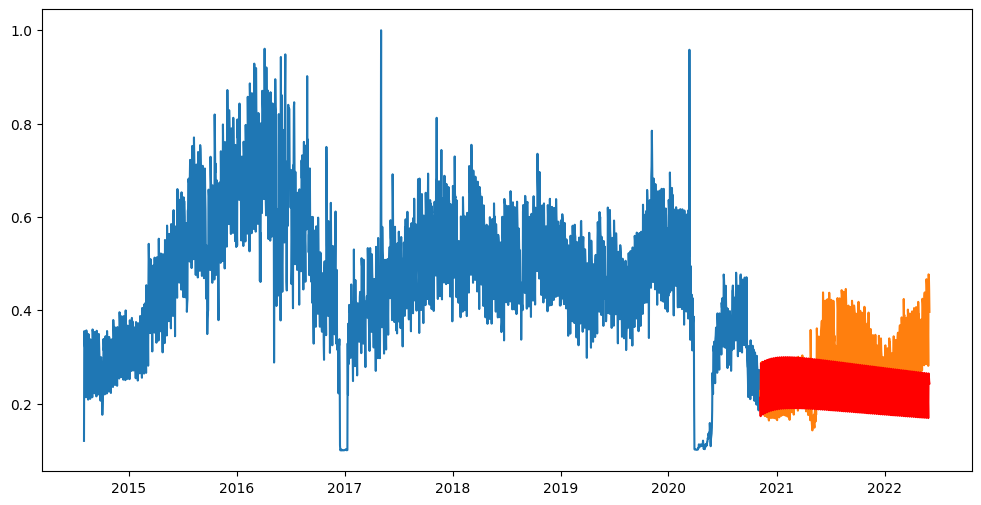

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

num_rows = 2861
df = pd.DataFrame({
    'dataset': Dataset.flatten(),
    'ticket_sales': Labels.flatten()
}, index=pd.date_range(start='2014-08-03', periods=num_rows, freq='D'))

series = df['ticket_sales']

train_size = int(len(df) * 0.8)
train_df, test_df = df[:train_size], df[train_size:]
train_labels = train_df['ticket_sales'].values
test_labels = test_df['ticket_sales'].values

model = SARIMAX(train_labels,
                order=(2, 0, 1),
                seasonal_order=(1, 0, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

print(model_fit.summary())

forecast = model_fit.get_forecast(steps=len(test_labels))
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

rmse = np.sqrt(mean_squared_error(test_labels, forecast_mean))
mae = mean_absolute_error(test_labels, forecast_mean)
mape = mean_absolute_percentage_error(test_labels, forecast_mean)
print(f'Test RMSE (Full Forecast): {rmse:.4f}')
print(f'Test MAE (Full Forecast): {mae:.4f}')
print(f'Test MAPE (Full Forecast): {mape:.2f}%')

plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_labels, label='Training Sales')
plt.plot(test_df.index, test_labels, label='Actual Sales')
plt.plot(test_df.index, forecast_mean, label='SARIMA Forecast', color='red')
plt.fill_between(test_df.index,
                 confidence_intervals['lower y'],
                 confidence_intervals['upper y'],
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast: Ticket Sales')
plt.xlabel('Date')
plt.ylabel('Ticket Sales')
plt.legend()
plt.show()

n_future = 7
gap = 7
forecasts = []
actuals = []
forecast_indices = []

for i in range(gap, len(test_labels) - n_future + 1, gap + n_future):
    current_data = np.concatenate([train_labels, test_labels[:i]])
    model_chunk = SARIMAX(current_data,
                          order=(2, 0, 1),
                          seasonal_order=(1, 0, 1, 7),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
    model_chunk_fit = model_chunk.fit(disp=False)
    forecast = model_chunk_fit.get_forecast(steps=n_future)
    forecasts.append(forecast.predicted_mean)
    actuals.append(test_labels[i + gap:i + gap + n_future])
    forecast_indices.extend(test_df.index[i + gap:i + gap + n_future])

forecasts = np.concatenate(forecasts)
actuals = np.concatenate(actuals)

rmse_chunk = np.sqrt(mean_squared_error(actuals, forecasts))
mae_chunk = mean_absolute_error(actuals, forecasts)
mape_chunk = mean_absolute_percentage_error(actuals, forecasts)
print(f'Chunked Forecast (gap=7, n_future=7) RMSE: {rmse_chunk:.4f}')
print(f'Chunked Forecast MAE: {mae_chunk:.4f}')
print(f'Chunked Forecast MAPE: {mape_chunk:.2f}%')

plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_labels, label='Training Sales')
plt.plot(test_df.index, test_labels, label='Actual Sales')
plt.plot(forecast_indices, forecasts, label='SARIMA Chunked Forecast', color='red')
plt.title('SARIMA Chunked Forecast: Ticket Sales')
plt.xlabel('Date')
plt.ylabel('Ticket Sales')
plt.legend()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8hnpp22/ci4v1wek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8hnpp22/z812pntw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75862', 'data', 'file=/tmp/tmpm8hnpp22/ci4v1wek.json', 'init=/tmp/tmpm8hnpp22/z812pntw.json', 'output', 'file=/tmp/tmpm8hnpp22/prophet_model7_ffwisk/prophet_model-20250820174226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:42:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:42:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test RMSE (Full Forecast): 0.0659
Test MAE (Full Forecast): 0.0528
Test MAPE (Full Forecast): 20.06%


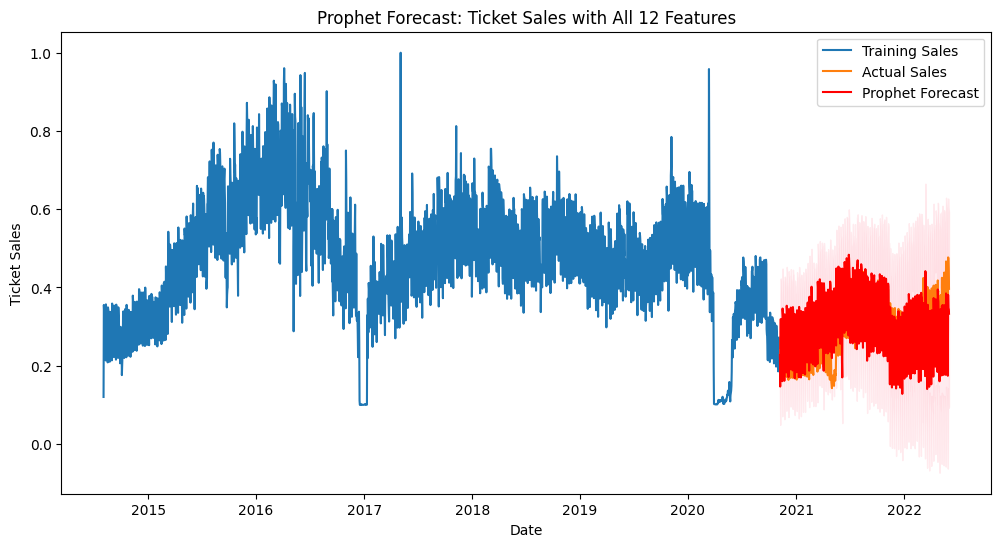

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8hnpp22/335r043f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8hnpp22/p6l0efqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34319', 'data', 'file=/tmp/tmpm8hnpp22/335r043f.json', 'init=/tmp/tmpm8hnpp22/p6l0efqu.json', 'output', 'file=/tmp/tmpm8hnpp22/prophet_modelfz_cy41u/prophet_model-20250820174227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:42:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:42:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8hnpp22/mbxc_58a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8hnpp22/bepejx_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Chunked Forecast (gap=7, n_future=7) RMSE: 0.0635
Chunked Forecast MAE: 0.0551
Chunked Forecast MAPE: 19.38%


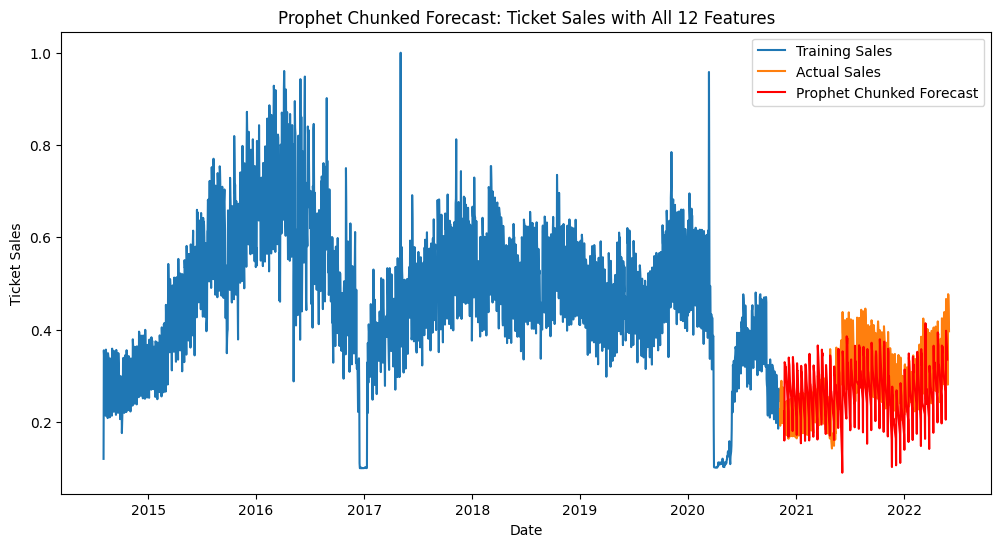

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

num_rows = 2861

for i in range(1, 12):
    if i == 2:
        Dataset[:, i] = np.random.choice([0.1, 1.0], num_rows)
    else:
        Dataset[:, i] = np.random.rand(num_rows)

feature_names = [
    'SearchCount', 'Turkey_Currency', 'Turkey_Holidays', 'Euro_Currency',
    'Ukraine_Currency', 'Dubai_Temperature', 'Doha_Temperature',
    'Azerbaijan_Currency', 'Kyiv_Temperature', 'Qatar_Capita',
    'Ukraine_Capita', 'Tashkent_Temperature'
]

df = pd.DataFrame({
    'ds': pd.date_range(start='2014-08-03', periods=num_rows, freq='D'),
    'y': Labels.flatten(),
    **{name: Dataset[:, i] for i, name in enumerate(feature_names)}
})

train_size = int(len(df) * 0.8)
train_df, test_df = df[:train_size], df[train_size:]
train_labels = train_df['y'].values
test_labels = test_df['y'].values

model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)

for regressor in feature_names:
    model.add_regressor(regressor)

model.fit(train_df[['ds', 'y'] + feature_names])

future = test_df[['ds'] + feature_names].copy()
forecast = model.predict(future)
forecast_mean = forecast['yhat'].values


rmse = np.sqrt(mean_squared_error(test_labels, forecast_mean))
mae = mean_absolute_error(test_labels, forecast_mean)
mape = mean_absolute_percentage_error(test_labels, forecast_mean)
print(f'Test RMSE (Full Forecast): {rmse:.4f}')
print(f'Test MAE (Full Forecast): {mae:.4f}')
print(f'Test MAPE (Full Forecast): {mape:.2f}%')

plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_labels, label='Training Sales')
plt.plot(test_df['ds'], test_labels, label='Actual Sales')
plt.plot(test_df['ds'], forecast_mean, label='Prophet Forecast', color='red')
plt.fill_between(test_df['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='pink', alpha=0.3)
plt.title('Prophet Forecast: Ticket Sales with All 12 Features')
plt.xlabel('Date')
plt.ylabel('Ticket Sales')
plt.legend()
plt.show()

n_future = 7
gap = 7
forecasts = []
actuals = []
forecast_indices = []

for i in range(gap, len(test_labels) - n_future + 1, gap + n_future):
    current_df = pd.concat([train_df, test_df.iloc[:i]])
    model_chunk = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='additive'
    )
    for regressor in feature_names:
        model_chunk.add_regressor(regressor)
    model_chunk.fit(current_df[['ds', 'y'] + feature_names])
    future_chunk = test_df.iloc[i + gap:i + gap + n_future][['ds'] + feature_names]
    if len(future_chunk) != n_future:
        continue
    forecast_chunk = model_chunk.predict(future_chunk)
    forecasts.append(forecast_chunk['yhat'].values)
    actuals.append(test_labels[i + gap:i + gap + n_future])
    forecast_indices.extend(test_df['ds'].iloc[i + gap:i + gap + n_future])

forecasts = np.concatenate(forecasts)
actuals = np.concatenate(actuals)

rmse_chunk = np.sqrt(mean_squared_error(actuals, forecasts))
mae_chunk = mean_absolute_error(actuals, forecasts)
mape_chunk = mean_absolute_percentage_error(actuals, forecasts)
print(f'Chunked Forecast (gap=7, n_future=7) RMSE: {rmse_chunk:.4f}')
print(f'Chunked Forecast MAE: {mae_chunk:.4f}')
print(f'Chunked Forecast MAPE: {mape_chunk:.2f}%')

plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_labels, label='Training Sales')
plt.plot(test_df['ds'], test_labels, label='Actual Sales')
plt.plot(forecast_indices, forecasts, label='Prophet Chunked Forecast', color='red')
plt.title('Prophet Chunked Forecast: Ticket Sales with All 12 Features')
plt.xlabel('Date')
plt.ylabel('Ticket Sales')
plt.legend()
plt.show()


Running Prophet with 4 features: ['SearchCount', 'Turkey_Currency', 'Turkey_Holidays', 'Euro_Currency']


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/i77p9l1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/3n929cy9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54275', 'data', 'file=/tmp/tmp_q5gz9n5/i77p9l1i.json', 'init=/tmp/tmp_q5gz9n5/3n929cy9.json', 'output', 'file=/tmp/tmp_q5gz9n5/prophet_model0ejqjy1a/prophet_model-20250821142120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Results with 4 features (Full Forecast):
Test RMSE: 0.0659
Test MAE: 0.0526
Test MAPE: 20.02%


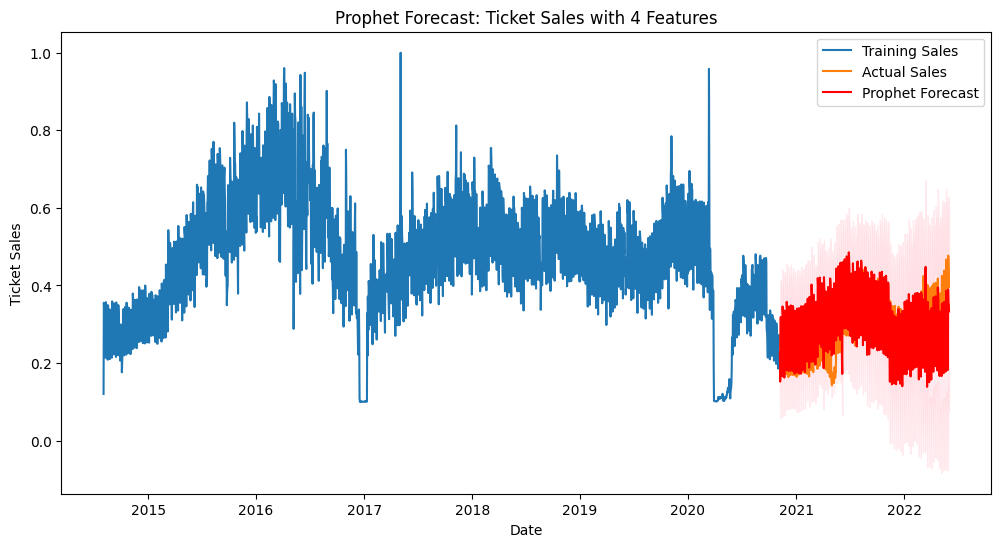

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/ut50oz76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/lj5qubqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17611', 'data', 'file=/tmp/tmp_q5gz9n5/ut50oz76.json', 'init=/tmp/tmp_q5gz9n5/lj5qubqx.json', 'output', 'file=/tmp/tmp_q5gz9n5/prophet_model94rwsci1/prophet_model-20250821142121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/dq32726e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/megwf8b4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Results with 4 features (Chunked Forecast, gap=7, n_future=7):
Chunked RMSE: 0.0638
Chunked MAE: 0.0555
Chunked MAPE: 19.48%


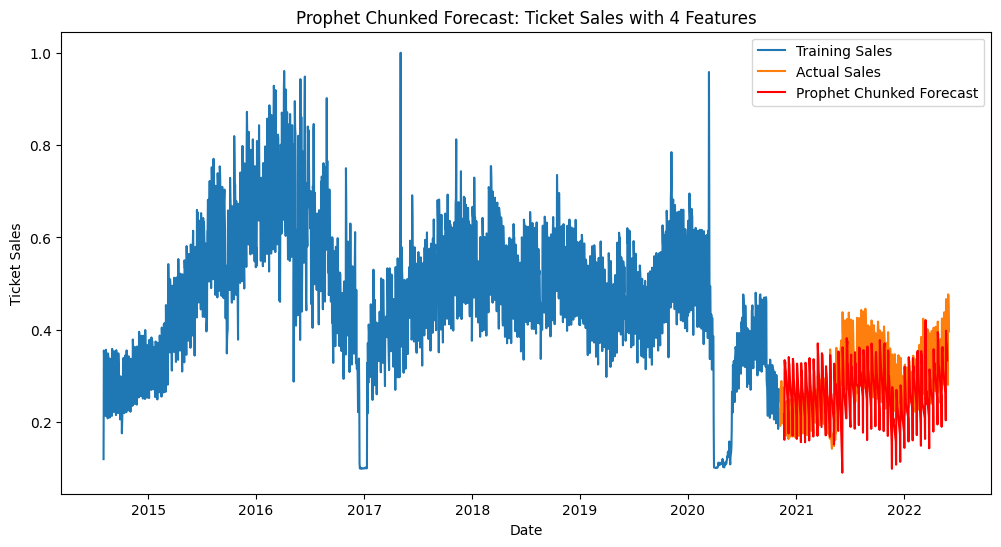

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/8vhc0ox1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/y4ucvycz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6807', 'data', 'file=/tmp/tmp_q5gz9n5/8vhc0ox1.json', 'init=/tmp/tmp_q5gz9n5/y4ucvycz.json', 'output', 'file=/tmp/tmp_q5gz9n5/prophet_modelfp82ofhv/prophet_model-20250821142147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Running Prophet with 6 features: ['SearchCount', 'Turkey_Currency', 'Turkey_Holidays', 'Euro_Currency', 'Ukraine_Currency', 'Dubai_Temperature']


14:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Results with 6 features (Full Forecast):
Test RMSE: 0.0658
Test MAE: 0.0526
Test MAPE: 20.00%


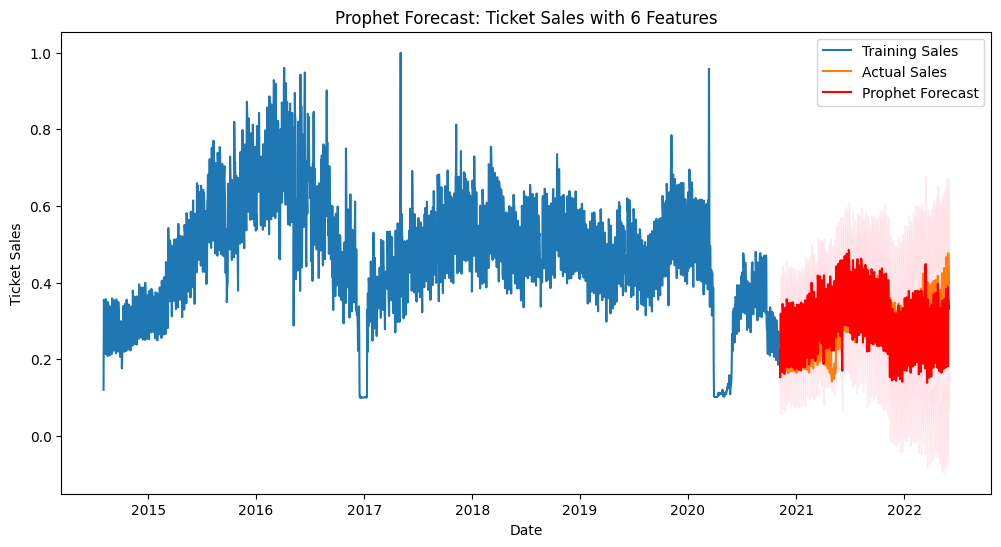

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/3ep6l938.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/7wyv2oby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11051', 'data', 'file=/tmp/tmp_q5gz9n5/3ep6l938.json', 'init=/tmp/tmp_q5gz9n5/7wyv2oby.json', 'output', 'file=/tmp/tmp_q5gz9n5/prophet_model3xp87t3y/prophet_model-20250821142148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/eudzgj6m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/smms8ggx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Results with 6 features (Chunked Forecast, gap=7, n_future=7):
Chunked RMSE: 0.0638
Chunked MAE: 0.0554
Chunked MAPE: 19.49%


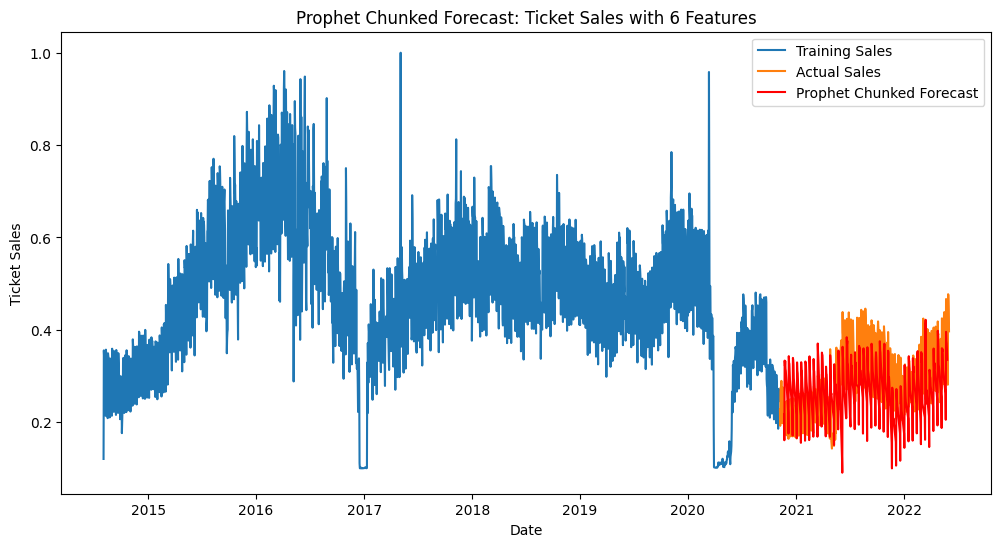


Running Prophet with 10 features: ['SearchCount', 'Turkey_Currency', 'Turkey_Holidays', 'Euro_Currency', 'Ukraine_Currency', 'Dubai_Temperature', 'Doha_Temperature', 'Azerbaijan_Currency', 'Kyiv_Temperature', 'Qatar_Capita']


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/9x553mq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/vnrgqeu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94408', 'data', 'file=/tmp/tmp_q5gz9n5/9x553mq3.json', 'init=/tmp/tmp_q5gz9n5/vnrgqeu4.json', 'output', 'file=/tmp/tmp_q5gz9n5/prophet_model9q19_4z3/prophet_model-20250821142217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Results with 10 features (Full Forecast):
Test RMSE: 0.0657
Test MAE: 0.0525
Test MAPE: 19.95%


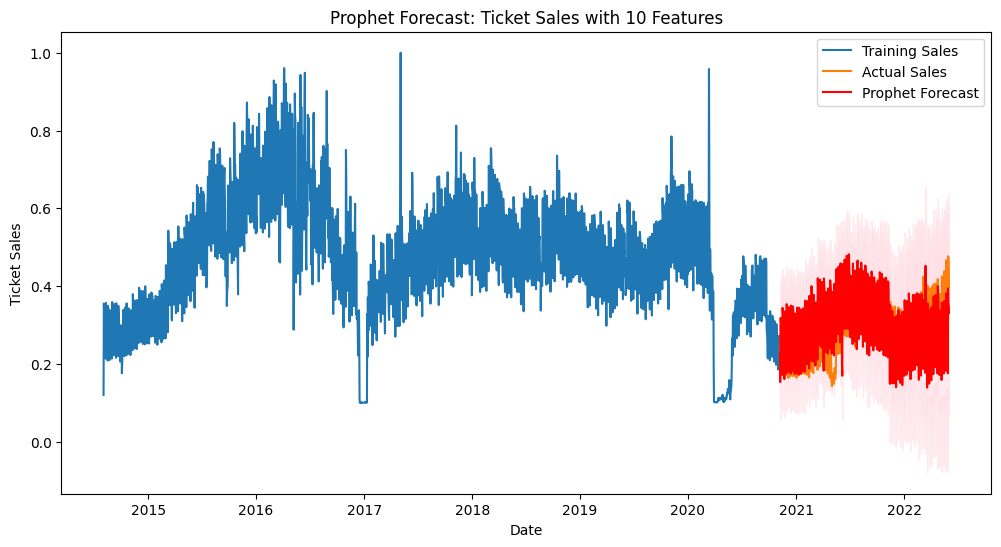

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/y1mbf55l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/xivhca3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42476', 'data', 'file=/tmp/tmp_q5gz9n5/y1mbf55l.json', 'init=/tmp/tmp_q5gz9n5/xivhca3v.json', 'output', 'file=/tmp/tmp_q5gz9n5/prophet_modeluunf1c6o/prophet_model-20250821142218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/gbk5e0iw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/n0yjoffd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Results with 10 features (Chunked Forecast, gap=7, n_future=7):
Chunked RMSE: 0.0636
Chunked MAE: 0.0553
Chunked MAPE: 19.41%


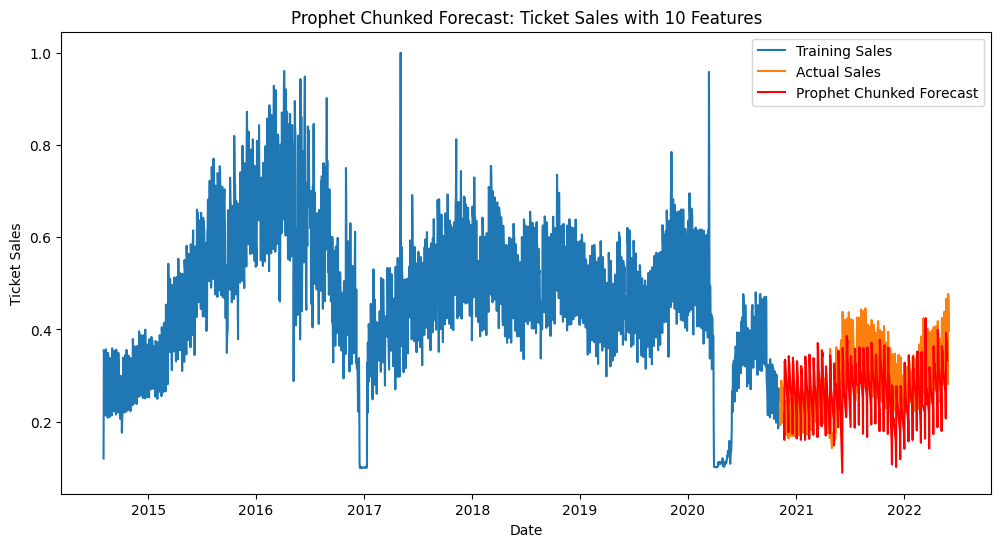

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/lkgnov1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/gm_1flnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9706', 'data', 'file=/tmp/tmp_q5gz9n5/lkgnov1e.json', 'init=/tmp/tmp_q5gz9n5/gm_1flnd.json', 'output', 'file=/tmp/tmp_q5gz9n5/prophet_modelfv0hnmv1/prophet_model-20250821142248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Running Prophet with 12 features: ['SearchCount', 'Turkey_Currency', 'Turkey_Holidays', 'Euro_Currency', 'Ukraine_Currency', 'Dubai_Temperature', 'Doha_Temperature', 'Azerbaijan_Currency', 'Kyiv_Temperature', 'Qatar_Capita', 'Ukraine_Capita', 'Tashkent_Temperature']


14:22:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Results with 12 features (Full Forecast):
Test RMSE: 0.0659
Test MAE: 0.0527
Test MAPE: 20.02%


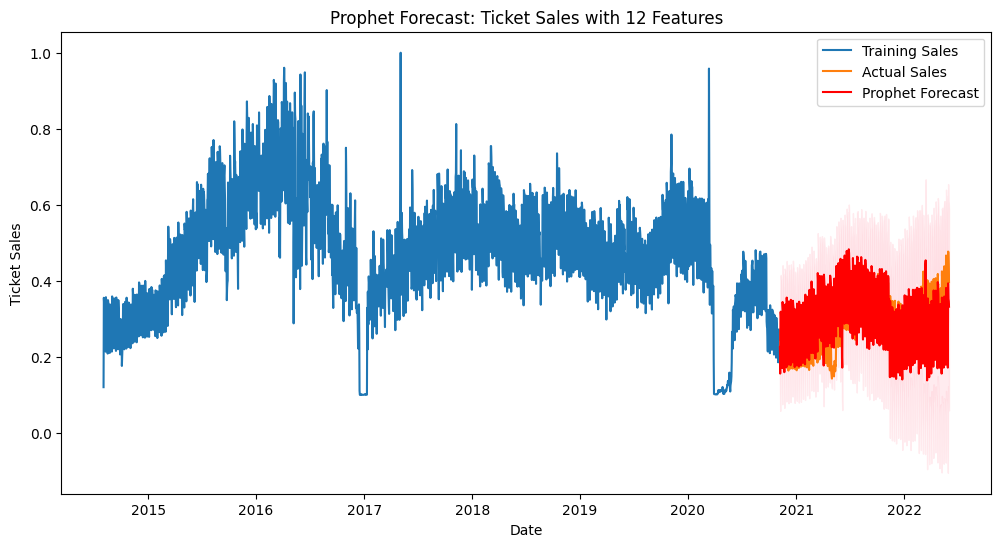

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/u1tfwcbr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/ou10uw8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70770', 'data', 'file=/tmp/tmp_q5gz9n5/u1tfwcbr.json', 'init=/tmp/tmp_q5gz9n5/ou10uw8d.json', 'output', 'file=/tmp/tmp_q5gz9n5/prophet_modelvf0b1fbh/prophet_model-20250821142249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/h6do81om.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_q5gz9n5/szj2_u9c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Results with 12 features (Chunked Forecast, gap=7, n_future=7):
Chunked RMSE: 0.0635
Chunked MAE: 0.0552
Chunked MAPE: 19.41%


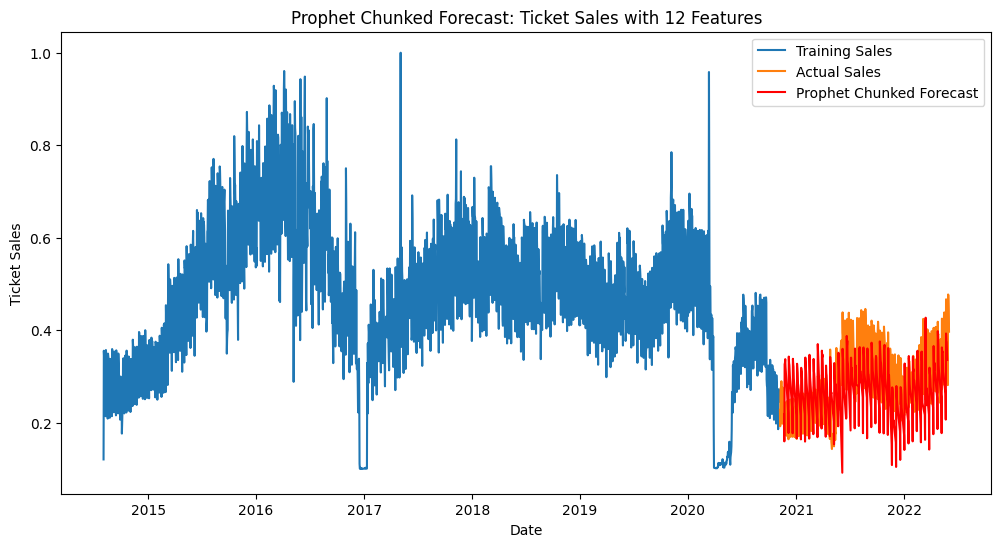


Summary of Results:

4 Features:
  Full Forecast - RMSE: 0.0659, MAE: 0.0526, MAPE: 20.02%
  Chunked Forecast - RMSE: 0.0638, MAE: 0.0555, MAPE: 19.48%

6 Features:
  Full Forecast - RMSE: 0.0658, MAE: 0.0526, MAPE: 20.00%
  Chunked Forecast - RMSE: 0.0638, MAE: 0.0554, MAPE: 19.49%

10 Features:
  Full Forecast - RMSE: 0.0657, MAE: 0.0525, MAPE: 19.95%
  Chunked Forecast - RMSE: 0.0636, MAE: 0.0553, MAPE: 19.41%

12 Features:
  Full Forecast - RMSE: 0.0659, MAE: 0.0527, MAPE: 20.02%
  Chunked Forecast - RMSE: 0.0635, MAE: 0.0552, MAPE: 19.41%


In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

num_rows = 2861

for i in range(1, 12):
    if i == 2:
        Dataset[:, i] = np.random.choice([0.1, 1.0], num_rows)
    else:
        Dataset[:, i] = np.random.rand(num_rows)

feature_names = [
    'SearchCount', 'Turkey_Currency', 'Turkey_Holidays', 'Euro_Currency',
    'Ukraine_Currency', 'Dubai_Temperature', 'Doha_Temperature',
    'Azerbaijan_Currency', 'Kyiv_Temperature', 'Qatar_Capita',
    'Ukraine_Capita', 'Tashkent_Temperature'
]

feature_subsets = {
    4: feature_names[:4],
    6: feature_names[:6],
    10: feature_names[:10],
    12: feature_names
}

df = pd.DataFrame({
    'ds': pd.date_range(start='2014-08-03', periods=num_rows, freq='D'),
    'y': Labels.flatten(),
    **{name: Dataset[:, i] for i, name in enumerate(feature_names)}
})

train_size = int(len(df) * 0.8)
train_df, test_df = df[:train_size], df[train_size:]
train_labels = train_df['y'].values
test_labels = test_df['y'].values

def run_prophet(features, train_df, test_df, train_labels, test_labels):
    model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='additive'
    )
    for regressor in features:
        model.add_regressor(regressor)

    model.fit(train_df[['ds', 'y'] + features])

    future = test_df[['ds'] + features].copy()
    forecast = model.predict(future)
    forecast_mean = forecast['yhat'].values

    rmse = np.sqrt(mean_squared_error(test_labels, forecast_mean))
    mae = mean_absolute_error(test_labels, forecast_mean)
    mape = mean_absolute_percentage_error(test_labels, forecast_mean)

    print(f'\nResults with {len(features)} features (Full Forecast):')
    print(f'Test RMSE: {rmse:.4f}')
    print(f'Test MAE: {mae:.4f}')
    print(f'Test MAPE: {mape:.2f}%')

    plt.figure(figsize=(12, 6))
    plt.plot(train_df['ds'], train_labels, label='Training Sales')
    plt.plot(test_df['ds'], test_labels, label='Actual Sales')
    plt.plot(test_df['ds'], forecast_mean, label='Prophet Forecast', color='red')
    plt.fill_between(test_df['ds'],
                     forecast['yhat_lower'],
                     forecast['yhat_upper'],
                     color='pink', alpha=0.3)
    plt.title(f'Prophet Forecast: Ticket Sales with {len(features)} Features')
    plt.xlabel('Date')
    plt.ylabel('Ticket Sales')
    plt.legend()
    plt.show()

    n_future = 7
    gap = 7
    forecasts = []
    actuals = []
    forecast_indices = []

    for i in range(gap, len(test_labels) - n_future + 1, gap + n_future):
        current_df = pd.concat([train_df, test_df.iloc[:i]])
        model_chunk = Prophet(
            yearly_seasonality=False,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='additive'
        )
        for regressor in features:
            model_chunk.add_regressor(regressor)
        model_chunk.fit(current_df[['ds', 'y'] + features])
        future_chunk = test_df.iloc[i + gap:i + gap + n_future][['ds'] + features]
        if len(future_chunk) != n_future:
            continue
        forecast_chunk = model_chunk.predict(future_chunk)
        forecasts.append(forecast_chunk['yhat'].values)
        actuals.append(test_labels[i + gap:i + gap + n_future])
        forecast_indices.extend(test_df['ds'].iloc[i + gap:i + gap + n_future])

    forecasts = np.concatenate(forecasts)
    actuals = np.concatenate(actuals)

    rmse_chunk = np.sqrt(mean_squared_error(actuals, forecasts))
    mae_chunk = mean_absolute_error(actuals, forecasts)
    mape_chunk = mean_absolute_percentage_error(actuals, forecasts)

    print(f'Results with {len(features)} features (Chunked Forecast, gap=7, n_future=7):')
    print(f'Chunked RMSE: {rmse_chunk:.4f}')
    print(f'Chunked MAE: {mae_chunk:.4f}')
    print(f'Chunked MAPE: {mape_chunk:.2f}%')

    plt.figure(figsize=(12, 6))
    plt.plot(train_df['ds'], train_labels, label='Training Sales')
    plt.plot(test_df['ds'], test_labels, label='Actual Sales')
    plt.plot(forecast_indices, forecasts, label='Prophet Chunked Forecast', color='red')
    plt.title(f'Prophet Chunked Forecast: Ticket Sales with {len(features)} Features')
    plt.xlabel('Date')
    plt.ylabel('Ticket Sales')
    plt.legend()
    plt.show()

    return rmse, mae, mape, rmse_chunk, mae_chunk, mape_chunk

results = {}
for num_features, features in feature_subsets.items():
    print(f'\nRunning Prophet with {num_features} features: {features}')
    results[num_features] = run_prophet(features, train_df, test_df, train_labels, test_labels)

print('\nSummary of Results:')
for num_features in feature_subsets:
    rmse, mae, mape, rmse_chunk, mae_chunk, mape_chunk = results[num_features]
    print(f'\n{num_features} Features:')
    print(f'  Full Forecast - RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%')
    print(f'  Chunked Forecast - RMSE: {rmse_chunk:.4f}, MAE: {mae_chunk:.4f}, MAPE: {mape_chunk:.2f}%')